to do:

2) check for students who have events in high school AFTER the year we are looking at (that should not happen)

3) create better diagrams for results

steps to process the ranked athlete file:

1) Edit the file Div1TrackFieldTopAthletes.xslx in MyDrive\TrackFIeldData\RankedAthletes

2) Save the 2019 Male file to this same folder as Div1TrackFieldTopAthletes2019M.csv

3) Save the 2020 Male file to this same folder as Div1TrackFieldTopAthletes2020M.csv

4) OPen this notebook RankedAthletes.ipynb and run the first part to create the output files in folder /content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletesAllClean.csv

5) This file contains a consolidated list of athletes and links but does not contain event data. Take this file and run it with the screen scrapper with function get_events_for_ranked_athletes(username, password) to get the files RankAthletesEvents1.csv, 2.csv etc. These contain the events for the athletes

6) Put those files into the folder [root]\TrackFieldData\RankedAthletes

7) Open the notebook RankedAthletes.ipynb and run the second part, which reads these RankedAthleteEvents#.csv files and does analysis of them

In [326]:
import json
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import missingno as mno
import datetime
import seaborn as sns
import datetime as datetime

In [327]:
from google.colab import drive

In [328]:
from os.path import exists

In [329]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# get the ranked athletes lists (manually created) and combine them

What I really need is the grade, athlete name, link to the althete HS, link to athlete College, and Went to Div 1 TF

https://superuser.com/questions/430260/excel-convert-a-column-with-hyperlinks-to-just-display-the-links

https://www.excel-university.com/extract-url-from-hyperlink-with-an-excel-formula/

In [330]:
df_ranked_athletes_2019M = pd.read_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletes2019M.csv")
df_ranked_athletes_2019M.head()


,Rank,Age,Grade,Athlete,AthleteLink,MarkState,Unnamed: 6,Team,Date,Meet,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,20.30 (2.3)PR,NaN,Unattached,23-Jun,USATF U-20 Junior National Championships,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,20.48 (-.4)PR,NaN,Unattached,8-Jun,Great Southwest Classic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,18.0,12,Cameron Miller,https://www.athletic.net/athlete/21634977/trac...,20.52 (3.9)PR,TX,Bishop Dunne Catholic,4-May,TAPPS 6A State Championship,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,18.0,12,Kenan Christon,https://www.athletic.net/athlete/9337954/track...,20.55 (1.9)PR,CA,Madison,11-May,CIF San Diego Section Prelims,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,12,Kennedy Harrison,https://www.athletic.net/athlete/8742890/track...,20.60PR,TX,DeSoto,18-Apr,UIL 6A Area 07/08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
df_ranked_athletes_2019M.columns

Index(['Rank', 'Age', 'Grade', 'Athlete', 'AthleteLink', 'MarkState',
       'Unnamed: 6', 'Team', 'Date', 'Meet', 'CollegeLink', 'CollegeBioLink',
       'WentToDivITF', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [332]:
df_ranked_athletes_2019M["RankYear"] = 2019

In [333]:
df_ranked_athletes_2020M = pd.read_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletes2020M.csv")
df_ranked_athletes_2020M.head()


,Rank,Age,Grade,Athlete,AthleteLink,Mark,ST,Team,Date,Meet,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.0,16.0,11,Erriyon Knighton,https://www.athletic.net/athlete/14521052/trac...,20.33 (.3)PR,FL,My Brothers Keeper Track Club,Aug 8,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,20.55 (3.5)PR,FL,Miami Northwestern,Mar 7,Sam Burley Hall of Fame Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,12,Robert Gregory,https://www.athletic.net/athlete/21731975/trac...,20.65 (-1.4)PR,TX,Greater Houston Track,August 8,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,12,Auhmad Robinson,https://www.athletic.net/athlete/21738656/trac...,20.91 (-1.4)PR,TX,Dallas Mustangs,Aug 8,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,10,Evan Stewart,https://www.athletic.net/athlete/14577418/trac...,21.08PR,TX,Frisco Liberty,Mar 5,The Colony Cougar Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
df_ranked_athletes_2020M["RankYear"] = 2020

In [335]:
df_ranked_athletes_2020M.columns

Index(['Rank', 'Age', 'Grade', 'Athlete', 'AthleteLink', 'Mark', 'ST', 'Team',
       'Date', 'Meet', 'CollegeLink', 'CollegeBioLink', 'WentToDivITF',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'RankYear'],
      dtype='object')

In [336]:
df_ranked_athletes_2020M

,Rank,Age,Grade,Athlete,AthleteLink,Mark,ST,Team,Date,Meet,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,RankYear
0,1.0,16.0,11,Erriyon Knighton,https://www.athletic.net/athlete/14521052/trac...,20.33 (.3)PR,FL,My Brothers Keeper Track Club,Aug 8,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,20.55 (3.5)PR,FL,Miami Northwestern,Mar 7,Sam Burley Hall of Fame Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,3.0,NaN,12,Robert Gregory,https://www.athletic.net/athlete/21731975/trac...,20.65 (-1.4)PR,TX,Greater Houston Track,August 8,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,4.0,NaN,12,Auhmad Robinson,https://www.athletic.net/athlete/21738656/trac...,20.91 (-1.4)PR,TX,Dallas Mustangs,Aug 8,AAU National Junior Olympic Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,5.0,NaN,10,Evan Stewart,https://www.athletic.net/athlete/14577418/trac...,21.08PR,TX,Frisco Liberty,Mar 5,The Colony Cougar Invitational,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [337]:
df_ranked_athletes_2019M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear", "WentToDivITF"]]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes
1,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,2019,Yes
2,3.0,18.0,12,Cameron Miller,https://www.athletic.net/athlete/21634977/trac...,2019,Yes
3,4.0,18.0,12,Kenan Christon,https://www.athletic.net/athlete/9337954/track...,2019,NaN
4,5.0,NaN,12,Kennedy Harrison,https://www.athletic.net/athlete/8742890/track...,2019,Delayed
...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,2019,NaN
995,NaN,NaN,NaN,NaN,NaN,2019,NaN
996,NaN,NaN,NaN,NaN,NaN,2019,NaN
997,NaN,NaN,NaN,NaN,NaN,2019,NaN


In [338]:
df_ranked_athletes_2019M[df_ranked_athletes_2019M["WentToDivITF"].notna()]["WentToDivITF"]

0          Yes
1          Yes
2          Yes
4      Delayed
5          Yes
        ...   
288         No
289         No
293         No
294         No
299         No
Name: WentToDivITF, Length: 192, dtype: object

In [339]:
len(df_ranked_athletes_2019M[df_ranked_athletes_2019M["WentToDivITF"].notna()])

192

In [340]:
df_ranked_athletes_2020M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear","WentToDivITF"]].head()

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,16.0,11,Erriyon Knighton,https://www.athletic.net/athlete/14521052/trac...,2020,NaN
1,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,2020,Yes
2,3.0,NaN,12,Robert Gregory,https://www.athletic.net/athlete/21731975/trac...,2020,Yes
3,4.0,NaN,12,Auhmad Robinson,https://www.athletic.net/athlete/21738656/trac...,2020,Yes
4,5.0,NaN,10,Evan Stewart,https://www.athletic.net/athlete/14577418/trac...,2020,NaN


In [341]:
df_ranked_athletes_all = pd.concat([df_ranked_athletes_2019M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear","WentToDivITF"]],df_ranked_athletes_2020M[["Rank", "Age", "Grade", "Athlete", "AthleteLink","RankYear","WentToDivITF"]]], axis=0)
len(df_ranked_athletes_all)

1997

In [342]:
len(df_ranked_athletes_all["AthleteLink"].unique())

566

In [343]:
len(df_ranked_athletes_all)

1997

# get the event data and combine

In [344]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes
1,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,2019,Yes
2,3.0,18.0,12,Cameron Miller,https://www.athletic.net/athlete/21634977/trac...,2019,Yes
3,4.0,18.0,12,Kenan Christon,https://www.athletic.net/athlete/9337954/track...,2019,NaN
4,5.0,NaN,12,Kennedy Harrison,https://www.athletic.net/athlete/8742890/track...,2019,Delayed
...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,2020,NaN
994,NaN,NaN,NaN,NaN,NaN,2020,NaN
995,NaN,NaN,NaN,NaN,NaN,2020,NaN
996,NaN,NaN,NaN,NaN,NaN,2020,NaN


In [345]:
# prompt: rows in df_ranked_athletes_all where AthleteLink is not Nan

df_ranked_athletes_all = df_ranked_athletes_all[df_ranked_athletes_all["AthleteLink"].notna()]


In [346]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes
1,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,2019,Yes
2,3.0,18.0,12,Cameron Miller,https://www.athletic.net/athlete/21634977/trac...,2019,Yes
3,4.0,18.0,12,Kenan Christon,https://www.athletic.net/athlete/9337954/track...,2019,NaN
4,5.0,NaN,12,Kennedy Harrison,https://www.athletic.net/athlete/8742890/track...,2019,Delayed
...,...,...,...,...,...,...,...
295,NaN,17.0,10,Michael Stroup,https://www.athletic.net/athlete/11211114/trac...,2020,NaN
296,297.0,NaN,12,Marqus Hodges,https://www.athletic.net/athlete/12841197/trac...,2020,No
297,NaN,NaN,12,Matthew Norman,https://www.athletic.net/athlete/10948052/trac...,2020,No
298,NaN,18.0,12,Jalan McKeaver,https://www.athletic.net/athlete/12716465/trac...,2020,No


#### filter out everyone except 12 grade (graduating seniors)

In [347]:
# prompt: if Grade is "SR" change to "12" in df_ranked_athletes_all

df_ranked_athletes_all['Grade'].replace('Sr', '12', inplace=True)

<ipython-input-347-16fa480bb3af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranked_athletes_all['Grade'].replace('Sr', '12', inplace=True)


In [348]:
df_ranked_athletes_all['Grade'].value_counts()

12    317
11    175
10     70
9      18
-      18
5       1
2       1
Name: Grade, dtype: int64

In [349]:
# prompt: get the rows in df_ranked_athletes_all where Grade equals "12"

df_ranked_athletes_all = df_ranked_athletes_all[df_ranked_athletes_all['Grade'] == '12']

In [350]:
len(df_ranked_athletes_all)

317

In [351]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes
1,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,2019,Yes
2,3.0,18.0,12,Cameron Miller,https://www.athletic.net/athlete/21634977/trac...,2019,Yes
3,4.0,18.0,12,Kenan Christon,https://www.athletic.net/athlete/9337954/track...,2019,NaN
4,5.0,NaN,12,Kennedy Harrison,https://www.athletic.net/athlete/8742890/track...,2019,Delayed
...,...,...,...,...,...,...,...
294,295.0,NaN,12,Keishwan Salone,https://www.athletic.net/athlete/13245914/trac...,2020,No
296,297.0,NaN,12,Marqus Hodges,https://www.athletic.net/athlete/12841197/trac...,2020,No
297,NaN,NaN,12,Matthew Norman,https://www.athletic.net/athlete/10948052/trac...,2020,No
298,NaN,18.0,12,Jalan McKeaver,https://www.athletic.net/athlete/12716465/trac...,2020,No


## get the counts of records for men for 2019, 2020

In [352]:
df_ranked_athletes_all[(df_ranked_athletes_all["WentToDivITF"].notna())  & (df_ranked_athletes_all["RankYear"].astype(int) == 2019)]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes
1,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,2019,Yes
2,3.0,18.0,12,Cameron Miller,https://www.athletic.net/athlete/21634977/trac...,2019,Yes
4,5.0,NaN,12,Kennedy Harrison,https://www.athletic.net/athlete/8742890/track...,2019,Delayed
5,6.0,NaN,12,Joseph Fahnbulleh,https://www.athletic.net/athlete/16283841/trac...,2019,Yes
...,...,...,...,...,...,...,...
288,NaN,NaN,12,Cody Milmine,https://www.athletic.net/athlete/9637616/track...,2019,No
289,NaN,NaN,12,Julius Young,https://www.athletic.net/athlete/9206946/track...,2019,No
293,NaN,19.0,12,Jaymon Barrus,https://www.athletic.net/athlete/9209778/track...,2019,No
294,NaN,NaN,12,Tyler Thomas,https://www.athletic.net/athlete/9366388/track...,2019,No


In [353]:
len(df_ranked_athletes_all[(df_ranked_athletes_all["WentToDivITF"].notna())  & (df_ranked_athletes_all["RankYear"].astype(int) == 2019)])

165

In [354]:
len(df_ranked_athletes_all[(df_ranked_athletes_all["WentToDivITF"].notna())  & (df_ranked_athletes_all["RankYear"].astype(int) == 2020)])

131

## save to the file for usage in scraping athlete event records

In [355]:
df_ranked_athletes_all.to_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/Div1TrackFieldTopAthletesAllClean.csv")



In [356]:
# this is used for the analysis further below - when we need to join the athlete records to the event records
df_ranked_athletes_all["AthleteLink"] = df_ranked_athletes_all["AthleteLink"] + "/high-school"

<ipython-input-356-dfffa1c19365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranked_athletes_all["AthleteLink"] = df_ranked_athletes_all["AthleteLink"] + "/high-school"


# Analyze the events list for the ranked athletes
 the file above with the clean list of athletes is used to pull in the events for all these ranked athletes. Now that that list of events and analyze it.

In [357]:
all_df = []
file_index = 1
while (True):
  file_name = "/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/RankedAthleteEvents" +  str(file_index) + ".csv"
  if (exists(file_name) == False):
    break
  print("Reading " + file_name)
  df = pd.read_csv(file_name)
  all_df.append(df)
  file_index += 1

df_athlete_event = pd.concat(all_df)


Reading /content/gdrive/MyDrive/TrackFieldData/RankedAthletes/RankedAthleteEvents1.csv


## clean out the event data

In [358]:
df_athlete_event["Season"]

0         2019 Outdoor Season   Houston Strake Jesuit H...
1         2019 Outdoor Season   Houston Strake Jesuit H...
2         2019 Outdoor Season   Houston Strake Jesuit H...
3         2019 Outdoor Season   Houston Strake Jesuit H...
4         2019 Outdoor Season   Houston Strake Jesuit H...
                               ...                        
23080     2017 Outdoor Season   Monterey High School  1...
23081     2017 Outdoor Season   Monterey High School  1...
23082     2017 Outdoor Season   Monterey High School  1...
23083     2017 Outdoor Season   Monterey High School  1...
23084     2017 Outdoor Season   Monterey High School  1...
Name: Season, Length: 23085, dtype: object

In [359]:
df_athlete_event["SeasonBeginIndex"] = df_athlete_event["Season"].str.find("Season")

In [360]:
df_athlete_event.apply(lambda x: x["Season"][0:x["SeasonBeginIndex"]], axis=1)

0         2019 Outdoor 
1         2019 Outdoor 
2         2019 Outdoor 
3         2019 Outdoor 
4         2019 Outdoor 
              ...      
23080     2017 Outdoor 
23081     2017 Outdoor 
23082     2017 Outdoor 
23083     2017 Outdoor 
23084     2017 Outdoor 
Length: 23085, dtype: object

In [361]:
df_athlete_event["SeasonBeginIndex"] = df_athlete_event["Season"].str.find("Season")
df_athlete_event["SeasonFull"] = df_athlete_event.apply(lambda x: x["Season"][0:x["SeasonBeginIndex"]], axis=1)
df_athlete_event["EventYear"] = df_athlete_event["SeasonFull"].str.split(" ").str[1]
df_athlete_event["SeasonName"]= df_athlete_event["SeasonFull"].str.split(" ").str[2]
df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" "), axis=1)
df_athlete_event["StudentGrade"] = df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" ")[len(x["Season"][x["SeasonBeginIndex"] + 7:].strip().split(" ")) -2 ], axis=1)
df_athlete_event["SchoolAndSchoolType"] = df_athlete_event.apply(lambda x: x["Season"][x["SeasonBeginIndex"] + 7:].strip()[:len(x["Season"][x["SeasonBeginIndex"] + 7:].strip())-2], axis=1)


In [362]:
df_athlete_event["TimeFull"] = df_athlete_event["Time"]

In [363]:
df_athlete_event["Time"]

0         10.28 (1.9) 
1         10.22 (1.3) 
2         10.21 (4.2) 
3         10.20 (2.2) 
4         10.43 (2.1) 
             ...      
23080       21' 3" SR 
23081        20' 0.75"
23082        20' 10.5"
23083      21' 2.25"PR
23084    20' 4" (2.2) 
Name: Time, Length: 23085, dtype: object

In [364]:
df_athlete_event["Time"] = df_athlete_event["Time"].str.split(" ").str[0]

In [365]:
def get_school_level(df):
  if (df["SchoolAndSchoolType"].find("Collegiate") != -1):
    return "Collegiate"
  elif (df["SchoolAndSchoolType"].find("High School") != -1):
    return "HighSchool"
  else:
    return "Other"

In [366]:
df_athlete_event["SchoolLevel"] = df_athlete_event.apply(get_school_level, axis=1)

In [367]:
def get_school_name(df):
  if (df["SchoolAndSchoolType"].find("Collegiate") != -1):
      return df["SchoolAndSchoolType"][:df["SchoolAndSchoolType"].find("Collegiate")]
  elif (df["SchoolAndSchoolType"].find("High School") != -1):
      return df["SchoolAndSchoolType"][:df["SchoolAndSchoolType"].find("High")]
  else:
      return df["SchoolAndSchoolType"]

In [368]:
df_athlete_event["SchoolName"] = df_athlete_event.apply(get_school_name, axis=1)

In [369]:
df_athlete_event["EventYear"] = df_athlete_event["EventYear"].astype(int)

In [370]:
df_athlete_event["Event"] = df_athlete_event["Event"].str.strip()

In [371]:
def find_numeric(time):
    return re.findall(r'^\d+\.\d+', time)

In [372]:
df_athlete_event["TimeFull"] = df_athlete_event["Time"]

In [373]:
df_athlete_event["Time"] = df_athlete_event["Time"].apply(lambda x: find_numeric(x) )

In [374]:
df_athlete_event["Time"] = df_athlete_event["Time"].str[0].astype(float)

In [375]:
df_athlete_event = df_athlete_event.replace(r'^\s*$', np.nan, regex=True)

In [376]:
df_athlete_event["Date"].str.split().str[0]

0        Mar
1        Mar
2        Mar
3        Mar
4        Apr
        ... 
23080    May
23081    May
23082    May
23083    May
23084    May
Name: Date, Length: 23085, dtype: object

In [377]:
df_athlete_event["Date"].str.split().str[1]

0        16
1        16
2        30
3        30
4        11
         ..
23080     2
23081     5
23082    12
23083    20
23084    26
Name: Date, Length: 23085, dtype: object

In [378]:
from datetime import datetime

In [379]:
s = "15 July 2014"
dt = datetime.strptime(s, "%d %B %Y")

In [380]:
df_athlete_event["EventDateTime"] = df_athlete_event.apply(lambda x: datetime.strptime((x["Date"] + str(x["EventYear"])).strip(), '%b %d %Y'), axis=1)

In [381]:
df_athelete_event_clean = df_athlete_event.drop(columns=["SeasonBeginIndex", "SeasonFull", "Season", "SchoolAndSchoolType"])

In [382]:
df_athelete_event_clean.dtypes

Unnamed: 0                int64
AtheleteLink             object
Event                    object
placement                object
Time                    float64
Date                     object
MeetName                 object
MeetCode                 object
EventYear                 int64
SeasonName               object
StudentGrade             object
TimeFull                 object
SchoolLevel              object
SchoolName               object
EventDateTime    datetime64[ns]
dtype: object

In [383]:
df_athelete_event_clean

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.28,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS P,2019,Outdoor,12th,10.28,HighSchool,Houston Strake Jesuit,2019-03-16
1,1,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.22,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS F,2019,Outdoor,12th,10.22,HighSchool,Houston Strake Jesuit,2019-03-16
2,2,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.21,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II P,2019,Outdoor,12th,10.21,HighSchool,Houston Strake Jesuit,2019-03-30
3,3,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.20,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II F,2019,Outdoor,12th,10.20,HighSchool,Houston Strake Jesuit,2019-03-30
4,4,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.43,Apr 11,UIL 6A District 23,23-6A P,2019,Outdoor,12th,10.43,HighSchool,Houston Strake Jesuit,2019-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23080,23080,https://www.athletic.net/athlete/10909137/trac...,Long Jump,1,NaN,May 2,MBL Pacific Varsity Trials / JV Finals,V P,2017,Outdoor,9th,21',HighSchool,Monterey,2017-05-02
23081,23081,https://www.athletic.net/athlete/10909137/trac...,Long Jump,1,NaN,May 5,MBL Gabilan / Pacific Championships,V-P F,2017,Outdoor,9th,20',HighSchool,Monterey,2017-05-05
23082,23082,https://www.athletic.net/athlete/10909137/trac...,Long Jump,1,NaN,May 12,MBL Master's Meet/CCS Qualifying,V F,2017,Outdoor,9th,20',HighSchool,Monterey,2017-05-12
23083,23083,https://www.athletic.net/athlete/10909137/trac...,Long Jump,5,NaN,May 20,CIF Central Coast Section Trials,V P,2017,Outdoor,9th,21',HighSchool,Monterey,2017-05-20


# analyze the events longtitudally

In [384]:
df_athelete_event_clean["StudentGrade"].unique()

array(['12th', '11th', '10th', '9th', nan, '8th'], dtype=object)

In [385]:
pre_college_grades = ['12th', '11th', '10th', '9th', '8th']

In [386]:
df_athelete_event_clean_for_long = df_athelete_event_clean[df_athelete_event_clean['StudentGrade'].isin(pre_college_grades)]

In [387]:
# prompt: get a count of years with different EventYear values from df_athelete_event_clean_for_long

df_athelete_event_clean_for_long["EventYear"].value_counts()

2019    8207
2018    6804
2017    4587
2016    2082
2020    1288
2021      41
2011      27
2015      13
2012      12
2010      11
2009       5
Name: EventYear, dtype: int64

In [388]:
df_athelete_event_clean_for_long["StudentGrade"].value_counts()

11th    7373
12th    6866
10th    5528
9th     3292
8th       18
Name: StudentGrade, dtype: int64

In [389]:
df_athelete_event_clean_for_long

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.28,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS P,2019,Outdoor,12th,10.28,HighSchool,Houston Strake Jesuit,2019-03-16
1,1,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.22,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS F,2019,Outdoor,12th,10.22,HighSchool,Houston Strake Jesuit,2019-03-16
2,2,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.21,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II P,2019,Outdoor,12th,10.21,HighSchool,Houston Strake Jesuit,2019-03-30
3,3,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.20,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II F,2019,Outdoor,12th,10.20,HighSchool,Houston Strake Jesuit,2019-03-30
4,4,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.43,Apr 11,UIL 6A District 23,23-6A P,2019,Outdoor,12th,10.43,HighSchool,Houston Strake Jesuit,2019-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23080,23080,https://www.athletic.net/athlete/10909137/trac...,Long Jump,1,NaN,May 2,MBL Pacific Varsity Trials / JV Finals,V P,2017,Outdoor,9th,21',HighSchool,Monterey,2017-05-02
23081,23081,https://www.athletic.net/athlete/10909137/trac...,Long Jump,1,NaN,May 5,MBL Gabilan / Pacific Championships,V-P F,2017,Outdoor,9th,20',HighSchool,Monterey,2017-05-05
23082,23082,https://www.athletic.net/athlete/10909137/trac...,Long Jump,1,NaN,May 12,MBL Master's Meet/CCS Qualifying,V F,2017,Outdoor,9th,20',HighSchool,Monterey,2017-05-12
23083,23083,https://www.athletic.net/athlete/10909137/trac...,Long Jump,5,NaN,May 20,CIF Central Coast Section Trials,V P,2017,Outdoor,9th,21',HighSchool,Monterey,2017-05-20


In [390]:
df_athelete_event_clean_for_long.iloc[0]["AtheleteLink"]

'https://www.athletic.net/athlete/16283783/track-and-field/high-school'

In [391]:
df_event_with_athlete = pd.merge(df_ranked_athletes_all, df_athelete_event_clean_for_long, how='left', left_on=['AthleteLink'], right_on=['AtheleteLink'])

In [392]:
df_event_with_athlete.iloc[0]["AthleteLink"]

'https://www.athletic.net/athlete/16283783/track-and-field/high-school'

## 2019 Data

In [393]:
# this is the grade at the time of the ranking in 2019
df_event_with_athlete_2019 = df_event_with_athlete[(df_event_with_athlete["RankYear"] == 2019) & (df_event_with_athlete["EventYear"].isin([2019, 2018, 2017, 2016]))]

In [394]:
# prompt: create a pivot table of EventYear vs StudentGrade counts from df_athelete_event_clean_for_long

df_pivot = df_event_with_athlete_2019.pivot_table(values="Event", index="EventYear", columns="StudentGrade",  aggfunc="count")
df_pivot

StudentGrade,10th,11th,12th,9th
EventYear,,,,
2016,34.0,23.0,NaN,2020.0
2017,3261.0,39.0,31.0,40.0
2018,67.0,4551.0,15.0,NaN
2019,28.0,10.0,5477.0,NaN


In [395]:
df_event_with_athlete_2019_200Meters = df_event_with_athlete_2019[df_event_with_athlete_2019["Event"] == "200 Meters"]

In [396]:
df_event_with_athlete_2019_200Meters = df_event_with_athlete_2019_200Meters[df_event_with_athlete_2019_200Meters["Time"]< 30]

### 2019 Seniors, violin by year

Text(0, 0.5, 'Time (seconds)')

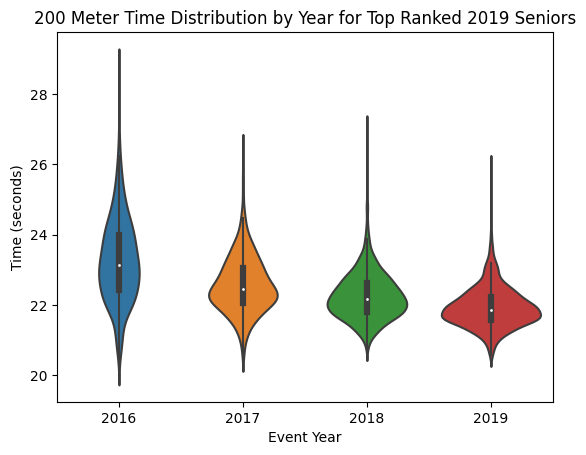

In [397]:
# prompt: show a violin graph of the Time value from df_event_with_athlete_2019_200Meters grouped by EventYear

ax = sns.violinplot(x="EventYear", y="Time", data=df_event_with_athlete_2019_200Meters)
ax.set_title("200 Meter Time Distribution by Year for Top Ranked 2019 Seniors")
ax.set_xlabel("Event Year")
ax.set_ylabel("Time (seconds)")

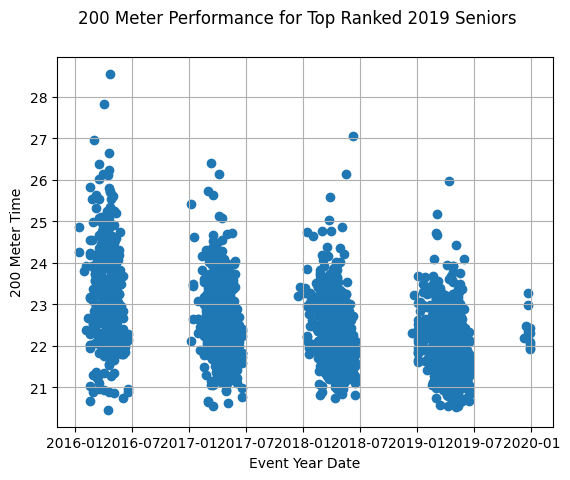

In [398]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters['EventDateTime'], df_event_with_athlete_2019_200Meters['Time'])


ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Seniors')

ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")


plt.show()


In [399]:
# only look at 12th grade and in 2019 (there were some records from 2020)

df_event_with_athlete_2019_200Meters_12th = df_event_with_athlete_2019_200Meters[(df_event_with_athlete_2019_200Meters["StudentGrade"] == "12th") & (df_event_with_athlete_2019_200Meters["EventDateTime"] < datetime(2019, 7, 1)) & (df_event_with_athlete_2019_200Meters["EventDateTime"] > datetime(2018, 10, 1))]

In [400]:
df_event_with_athlete_2019_200Meters_12th["EventDateTime"].sort_values().head(100)

7936    2019-01-04
8510    2019-01-04
14293   2019-01-04
9363    2019-01-05
3429    2019-01-05
           ...    
3027    2019-02-23
3028    2019-02-23
9478    2019-02-23
9232    2019-02-23
6157    2019-02-23
Name: EventDateTime, Length: 100, dtype: datetime64[ns]

https://www.statology.org/matplotlib-trendline/

In [401]:
df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)

9        1552694400000000000
10       1554940800000000000
11       1554940800000000000
92       1556841600000000000
93       1557532800000000000
                ...         
15534    1559260800000000000
15623    1556323200000000000
15624    1556323200000000000
15625    1556928000000000000
15626    1556928000000000000
Name: EventDateTime, Length: 1353, dtype: int64

In [650]:
z = np.polyfit(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th['Time'], 1)
p = np.poly1d(z)

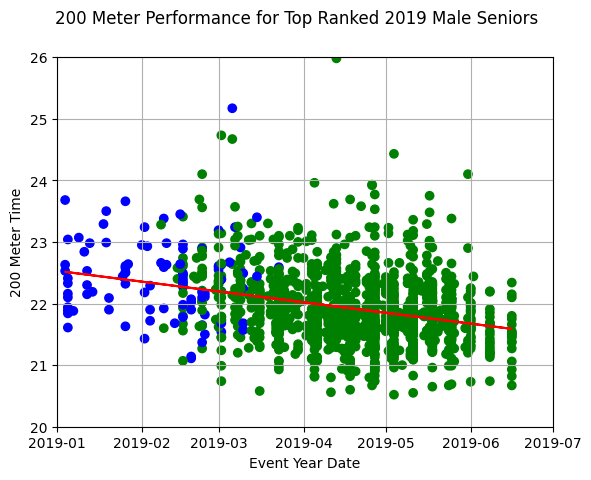

In [651]:


fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Male Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(20, 26)

plt.show()


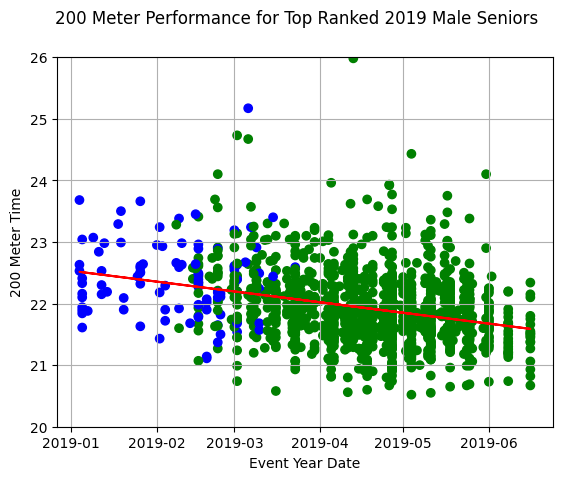

In [652]:
fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Male Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.ylim(20, 26)

plt.show()

#### fit a line with GLM



In [405]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [406]:
df_event_with_athlete_2019_200Meters_12th_forfit = df_event_with_athlete_2019_200Meters_12th[["EventDateTime",'Time']]
df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTime"].astype(int)

<ipython-input-406-b949067ae9e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTime"].astype(int)


In [407]:
# 1000000000 is seconds
# 60*60*24 gives days
df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)

<ipython-input-407-837283776f9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)


In [408]:
mod2019 = smf.ols(formula='Time ~ EventDateTimeInt', data=df_event_with_athlete_2019_200Meters_12th_forfit)
mod2019 = mod2019.fit()
print(mod2019.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     151.5
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           4.46e-33
Time:                        19:37:09   Log-Likelihood:                -1122.2
No. Observations:                1353   AIC:                             2248.
Df Residuals:                    1351   BIC:                             2259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          124.1829      8.307  

### 2019 full season with trend line

In [409]:
z = np.polyfit(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th['Time'], 3)
p = np.poly1d(z)

In [410]:
p

poly1d([ 2.26350606e-49, -1.05289172e-30,  1.63246119e-12, -8.43621535e+05])

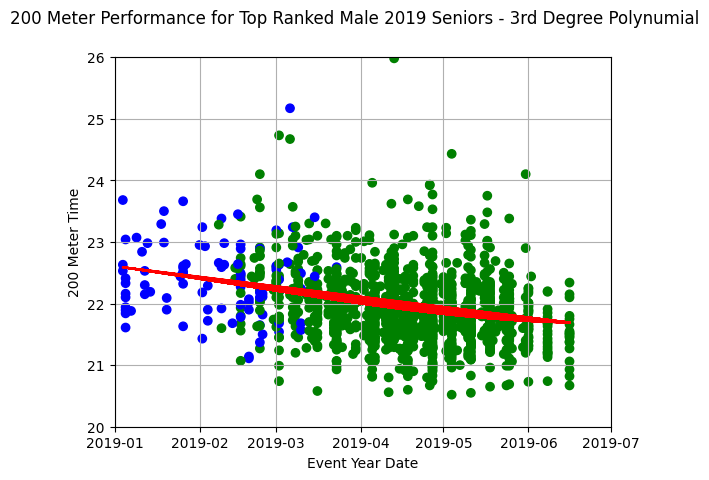

In [411]:

fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th['EventDateTime'], df_event_with_athlete_2019_200Meters_12th['Time'], c=df_event_with_athlete_2019_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked Male 2019 Seniors - 3rd Degree Polynumial')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(20, 26)

plt.show()

### 2019 - single trend line for outdoor and indoor, cut off at 03/15

In [412]:
df_event_with_athlete_2019_200Meters_12th_to315 = df_event_with_athlete_2019_200Meters_12th[df_event_with_athlete_2019_200Meters_12th["EventDateTime"] < datetime(2019,3,15)]

In [413]:
z = np.polyfit(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th_to315['Time'], 2)
p = np.poly1d(z)

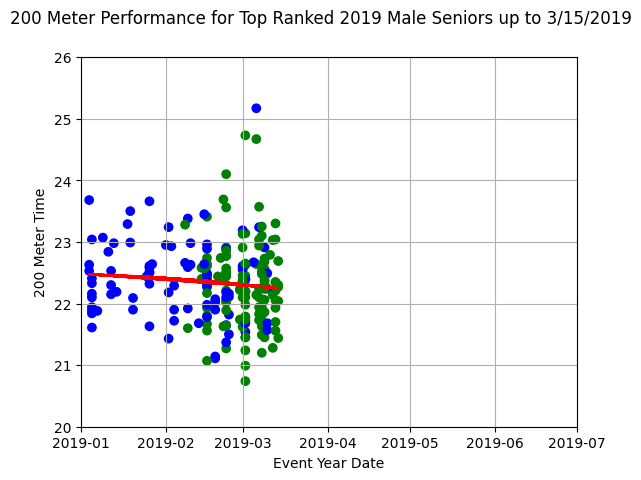

In [414]:

fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th_to315['EventDateTime'], df_event_with_athlete_2019_200Meters_12th_to315['Time'], c=df_event_with_athlete_2019_200Meters_12th_to315['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Male Seniors up to 3/15/2019')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"], p(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(20, 26)

plt.show()


#### fit a line with GLM

In [415]:
df_event_with_athlete_2019_200Meters_12th_to315_forfit = df_event_with_athlete_2019_200Meters_12th_to315[["EventDateTime",'Time']]
df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTime"].astype(int)

<ipython-input-415-3a32b6e5ce30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTime"].astype(int)


In [416]:
df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"])/(1000000000*60*60*24)

<ipython-input-416-17ff4269dadb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"] = (df_event_with_athlete_2019_200Meters_12th_to315_forfit["EventDateTimeInt"])/(1000000000*60*60*24)


In [417]:
mod2019 = smf.ols(formula='Time ~ EventDateTimeInt', data=df_event_with_athlete_2019_200Meters_12th_to315_forfit)
mod2019 = mod2019.fit()
print(mod2019.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.000
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.159
Time:                        19:37:10   Log-Likelihood:                -212.40
No. Observations:                 215   AIC:                             428.8
Df Residuals:                     213   BIC:                             435.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           82.5844     42.594  

### 2019 - combined outdoor and indoor with a separate trend line for each

In [418]:
df_event_with_athlete_2019_200Meters_12th_to315_outdoor = df_event_with_athlete_2019_200Meters_12th[(df_event_with_athlete_2019_200Meters_12th["EventDateTime"] < datetime(2019,3,15)) & (df_event_with_athlete_2019_200Meters_12th["SeasonName"] == "Outdoor")]

In [419]:
df_event_with_athlete_2019_200Meters_12th_to315_indoor = df_event_with_athlete_2019_200Meters_12th[(df_event_with_athlete_2019_200Meters_12th["EventDateTime"] < datetime(2019,3,15)) & (df_event_with_athlete_2019_200Meters_12th["SeasonName"] == "Indoor")]

In [420]:
z_outdoor = np.polyfit(df_event_with_athlete_2019_200Meters_12th_to315_outdoor["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th_to315_outdoor['Time'], 2)
p_outdoor = np.poly1d(z_outdoor)

In [421]:
z_indoor = np.polyfit(df_event_with_athlete_2019_200Meters_12th_to315_indoor["EventDateTime"].astype(int),  df_event_with_athlete_2019_200Meters_12th_to315_indoor['Time'], 2)
p_indoor = np.poly1d(z_indoor)

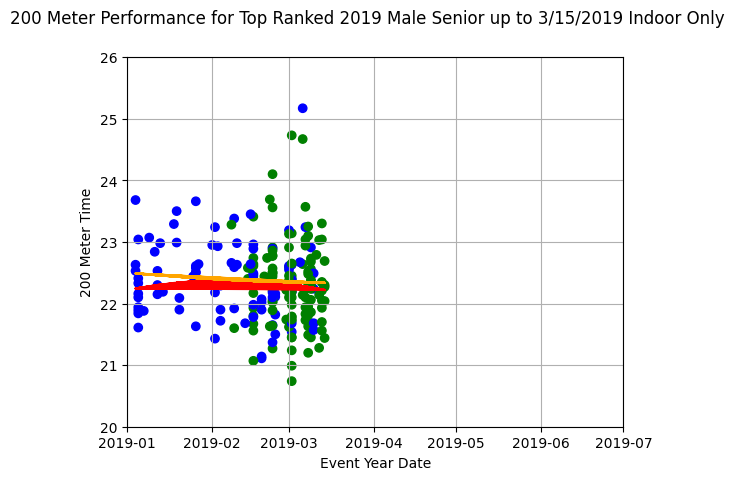

In [422]:

fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2019_200Meters_12th_to315['EventDateTime'], df_event_with_athlete_2019_200Meters_12th_to315['Time'], c=df_event_with_athlete_2019_200Meters_12th_to315['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2019 Male Senior up to 3/15/2019 Indoor Only')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")

plt.plot(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"], p_outdoor(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int)), color='red')
plt.plot(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"], p_indoor(df_event_with_athlete_2019_200Meters_12th_to315["EventDateTime"].astype(int)), color='orange')
plt.xlim(datetime(2019,1,1), datetime(2019,7,1))
plt.ylim(20, 26)

plt.show()


## 2020 Data

In [423]:
df_event_with_athlete_2020 = df_event_with_athlete[(df_event_with_athlete["RankYear"] == 2020) & (df_event_with_athlete["EventYear"].isin([2020, 2019, 2018, 2017]))]

In [424]:
df_pivot = df_event_with_athlete_2020.pivot_table(values="Event", index="EventYear", columns="StudentGrade",  aggfunc="count")
df_pivot

StudentGrade,10th,11th,12th,9th
EventYear,,,,
2017,NaN,1.0,NaN,1215.0
2018,2117.0,42.0,NaN,12.0
2019,5.0,2667.0,20.0,NaN
2020,NaN,13.0,1274.0,NaN


In [425]:
df_event_with_athlete_2020_200Meters = df_event_with_athlete_2020[df_event_with_athlete_2020["Event"] == "200 Meters"]

In [426]:
df_event_with_athlete_2020_200Meters[df_event_with_athlete_2020_200Meters["Time"]> 30]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
17563,NaN,NaN,12,Brenton Shippy,https://www.athletic.net/athlete/14500914/trac...,2020,No,17570,https://www.athletic.net/athlete/14500914/trac...,200 Meters,...,Apr 27,FHSAA 4A Regional 4 & 1A Regional 4,V P,2019,Outdoor,11th,47.81,HighSchool,Homestead Senior,2019-04-27


In [427]:
df_event_with_athlete_2020_200Meters = df_event_with_athlete_2020_200Meters[df_event_with_athlete_2020_200Meters["Time"]< 30]

### 2020 grades - violin by year

Text(0, 0.5, 'Time (seconds)')

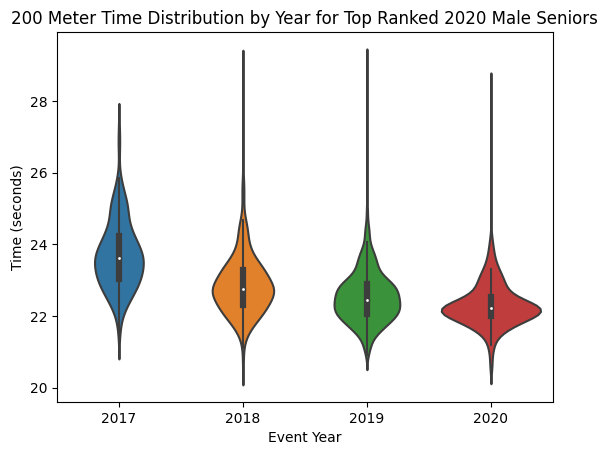

In [428]:
ax = sns.violinplot(x="EventYear", y="Time", data=df_event_with_athlete_2020_200Meters)
ax.set_title("200 Meter Time Distribution by Year for Top Ranked 2020 Male Seniors")
ax.set_xlabel("Event Year")
ax.set_ylabel("Time (seconds)")

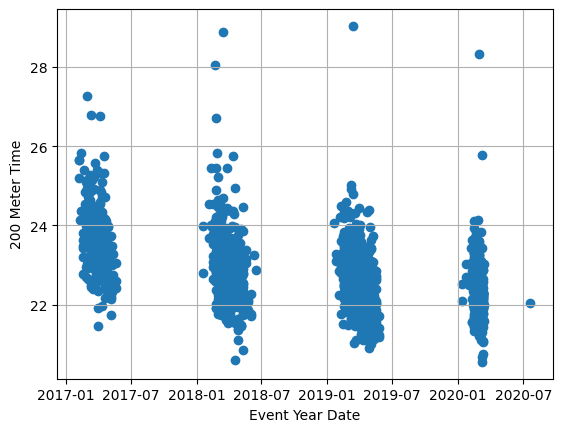

In [429]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_event_with_athlete_2020_200Meters['EventDateTime'], df_event_with_athlete_2020_200Meters['Time'])

ax.grid(True)

#plt.title("2019 - 100 Meters vs 200 Meters")

ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")


plt.show()

### 2020 with trend line

In [430]:
len(df_event_with_athlete_2020_200Meters["Athlete"].unique())

139

In [431]:
# only look at 12th grade and in 2019 (there were some records from 2020)

df_event_with_athlete_2020_200Meters_12th = df_event_with_athlete_2020_200Meters[(df_event_with_athlete_2020_200Meters["StudentGrade"] == "12th") & (df_event_with_athlete_2020_200Meters["EventDateTime"] < datetime(2020, 7, 1))]

In [432]:
z = np.polyfit(df_event_with_athlete_2020_200Meters_12th["EventDateTime"].astype(int),  df_event_with_athlete_2020_200Meters_12th['Time'], 1)
p = np.poly1d(z)

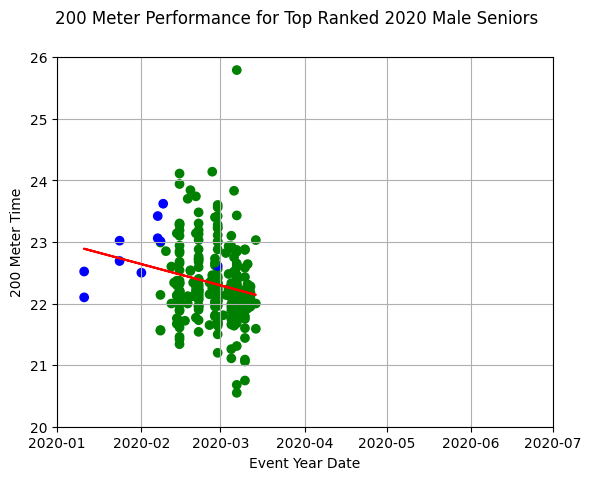

In [433]:


fig, ax = plt.subplots()

colors = {"Indoor":'blue', "Outdoor":'green'}


scatter = ax.scatter(df_event_with_athlete_2020_200Meters_12th['EventDateTime'], df_event_with_athlete_2020_200Meters_12th['Time'], c=df_event_with_athlete_2020_200Meters_12th['SeasonName'].map(colors))

ax.grid(True)

fig.suptitle('200 Meter Performance for Top Ranked 2020 Male Seniors')
ax.set_ylabel("Event Year")

plt.xlabel("Event Year Date")
plt.ylabel("200 Meter Time")


plt.plot(df_event_with_athlete_2020_200Meters_12th["EventDateTime"], p(df_event_with_athlete_2020_200Meters_12th["EventDateTime"].astype(int)), color='red')
plt.xlim(datetime(2020,1,1), datetime(2020,7,1))
plt.ylim(20, 26)

plt.show()

#### use glm to fit a model - 2020

In [434]:
df_event_with_athlete_2020_200Meters_12th_forfit = df_event_with_athlete_2020_200Meters_12th[["EventDateTime",'Time']]
df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTime"].astype(int)

<ipython-input-434-107c3a2b5568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTime"].astype(int)


In [435]:
df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"]

15671    1582934400000000000
15672    1583539200000000000
15673    1583539200000000000
15674    1583798400000000000
15675    1583798400000000000
                ...         
22793    1581033600000000000
22857    1582934400000000000
22858    1583539200000000000
22917    1582934400000000000
22918    1583366400000000000
Name: EventDateTimeInt, Length: 302, dtype: int64

In [436]:
# from datetime import datetime

# # current date and time
# now = datetime.now()
# print('Date and Time is:', now)

# timestamp = datetime.timestamp(now)
# print("timestamp =", timestamp)

In [437]:
# import datetime as dt
# from datetime import datetime
# datetime20200101 = dt.datetime(2020, 2, 29)

In [438]:
# s = "01 January 2020"
# datetime20200101 = datetime.strptime(s, "%d %B %Y")

In [439]:
# datetime20200101

In [440]:
# ts20200101 =  datetime.timestamp(datetime20200101)

In [441]:
# ts20200101

In [442]:
# 1000000000 is seconds
# 60*60*24 gives days
df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)

<ipython-input-442-58efc23bf46c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"] = (df_event_with_athlete_2020_200Meters_12th_forfit["EventDateTimeInt"])/(1000000000*60*60*24)


In [443]:
mod2020 = smf.ols(formula='Time ~ EventDateTimeInt', data=df_event_with_athlete_2020_200Meters_12th_forfit)
res2020 = mod2020.fit()
print(res2020.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9.983
Date:                Sat, 11 Nov 2023   Prob (F-statistic):            0.00174
Time:                        19:37:11   Log-Likelihood:                -309.37
No. Observations:                 302   AIC:                             622.7
Df Residuals:                     300   BIC:                             630.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          239.8539     68.847  

# project the values for 2020 students

## Using the top scope for grapes 9-12

### find the top score by grade for the students
include only students who have an event in year year

In [444]:
df_event_with_athlete_2020_200Meters

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
15671,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,2020,Yes,15678,https://www.athletic.net/athlete/12759052/trac...,200 Meters,...,Feb 29,The Elite 16 Invitational,3 F,2020,Outdoor,12th,21.20,HighSchool,Miami Northwestern,2020-02-29
15672,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,2020,Yes,15679,https://www.athletic.net/athlete/12759052/trac...,200 Meters,...,Mar 7,Sam Burley Hall of Fame Invitational,V P,2020,Outdoor,12th,20.68,HighSchool,Miami Northwestern,2020-03-07
15673,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,2020,Yes,15680,https://www.athletic.net/athlete/12759052/trac...,200 Meters,...,Mar 7,Sam Burley Hall of Fame Invitational,V F,2020,Outdoor,12th,20.55,HighSchool,Miami Northwestern,2020-03-07
15674,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,2020,Yes,15681,https://www.athletic.net/athlete/12759052/trac...,200 Meters,...,Mar 10,GMAC Qualifier,V S,2020,Outdoor,12th,21.60,HighSchool,Miami Northwestern,2020-03-10
15675,2.0,18.0,12,Da'Marcus Fleming,https://www.athletic.net/athlete/12759052/trac...,2020,Yes,15682,https://www.athletic.net/athlete/12759052/trac...,200 Meters,...,Mar 10,GMAC Qualifier,V P,2020,Outdoor,12th,21.06,HighSchool,Miami Northwestern,2020-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23052,NaN,18.0,12,Azjani Mcgill,https://www.athletic.net/athlete/10909137/trac...,2020,No,23060,https://www.athletic.net/athlete/10909137/trac...,200 Meters,...,Apr 19,Monterey and Pajaro Valley @ Watsonville HS,V F,2017,Outdoor,9th,23.41,HighSchool,Monterey,2017-04-19
23053,NaN,18.0,12,Azjani Mcgill,https://www.athletic.net/athlete/10909137/trac...,2020,No,23061,https://www.athletic.net/athlete/10909137/trac...,200 Meters,...,May 2,MBL Pacific Varsity Trials / JV Finals,V P,2017,Outdoor,9th,22.67,HighSchool,Monterey,2017-05-02
23054,NaN,18.0,12,Azjani Mcgill,https://www.athletic.net/athlete/10909137/trac...,2020,No,23062,https://www.athletic.net/athlete/10909137/trac...,200 Meters,...,May 5,MBL Gabilan / Pacific Championships,V-P F,2017,Outdoor,9th,23.02,HighSchool,Monterey,2017-05-05
23055,NaN,18.0,12,Azjani Mcgill,https://www.athletic.net/athlete/10909137/trac...,2020,No,23063,https://www.athletic.net/athlete/10909137/trac...,200 Meters,...,May 12,MBL Master's Meet/CCS Qualifying,V F,2017,Outdoor,9th,22.55,HighSchool,Monterey,2017-05-12


In [445]:
df_event_with_athlete_2019_200Meters["EventYear"].value_counts()

2019    1368
2018    1035
2017     637
2016     371
Name: EventYear, dtype: int64

In [446]:
df_event_with_athlete_2020_200Meters_12th[df_event_with_athlete_2020_200Meters_12th["Time"].isna()]

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime


In [447]:
!pip install researchpy

In [448]:
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats

In [449]:
df_event_with_athlete_2019_200Meters

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,Unnamed: 0,AtheleteLink,Event,...,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
9,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes,9,https://www.athletic.net/athlete/16283783/trac...,200 Meters,...,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS F,2019,Outdoor,12th,20.58,HighSchool,Houston Strake Jesuit,2019-03-16
10,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes,10,https://www.athletic.net/athlete/16283783/trac...,200 Meters,...,Apr 11,UIL 6A District 23,23-6A P,2019,Outdoor,12th,21.57,HighSchool,Houston Strake Jesuit,2019-04-11
11,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes,11,https://www.athletic.net/athlete/16283783/trac...,200 Meters,...,Apr 11,UIL 6A District 23,23-6A F,2019,Outdoor,12th,20.80,HighSchool,Houston Strake Jesuit,2019-04-11
36,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes,36,https://www.athletic.net/athlete/16283783/trac...,200 Meters,...,Mar 17,TSU Relays - HS & MS Divs (F-Sa),HS F,2018,Outdoor,11th,21.83,HighSchool,Houston Strake Jesuit,2018-03-17
92,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,2019,Yes,92,https://www.athletic.net/athlete/18652035/trac...,200 Meters,...,May 3,AAA 6A State Championships,V F,2019,Outdoor,12th,21.20PR,HighSchool,North Little Rock,2019-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,NaN,NaN,12,Donald Steele,https://www.athletic.net/athlete/11399671/trac...,2019,No,15655,https://www.athletic.net/athlete/11399671/trac...,200 Meters,...,May 5,AHSAA 6A State Track & Field Championships,V P,2018,Outdoor,12th,21.80,HighSchool,Carver Montgomery,2018-05-05
15649,NaN,NaN,12,Donald Steele,https://www.athletic.net/athlete/11399671/trac...,2019,No,15656,https://www.athletic.net/athlete/11399671/trac...,200 Meters,...,May 5,AHSAA 6A State Track & Field Championships,V F,2018,Outdoor,12th,22.18,HighSchool,Carver Montgomery,2018-05-05
15660,NaN,NaN,12,Donald Steele,https://www.athletic.net/athlete/11399671/trac...,2019,No,15667,https://www.athletic.net/athlete/11399671/trac...,200 Meters,...,Apr 1,Mobile Challenge of Champions,Open F,2017,Outdoor,11th,24.47,HighSchool,Carver Montgomery,2017-04-01
15661,NaN,NaN,12,Donald Steele,https://www.athletic.net/athlete/11399671/trac...,2019,No,15668,https://www.athletic.net/athlete/11399671/trac...,200 Meters,...,Apr 15,Mountain Brook Invitational,V P,2017,Outdoor,11th,25.08,HighSchool,Carver Montgomery,2017-04-15


In [450]:
df_best_times_2019_200Meter = df_event_with_athlete_2019_200Meters.groupby(["EventYear", "AtheleteLink"])["Time"].min().reset_index()

In [451]:
df_best_times_2019_200Meter

,EventYear,AtheleteLink,Time
0,2016,https://www.athletic.net/athlete/10020150/trac...,23.70
1,2016,https://www.athletic.net/athlete/10122054/trac...,22.00
2,2016,https://www.athletic.net/athlete/10172026/trac...,21.54
3,2016,https://www.athletic.net/athlete/10208347/trac...,24.19
4,2016,https://www.athletic.net/athlete/10853887/trac...,23.17
...,...,...,...
531,2019,https://www.athletic.net/athlete/9932412/track...,20.91
532,2019,https://www.athletic.net/athlete/9944319/track...,21.57
533,2019,https://www.athletic.net/athlete/9962891/track...,21.61
534,2019,https://www.athletic.net/athlete/9972616/track...,21.14


In [452]:
df_best_times_2019_200Meter_pivot= df_best_times_2019_200Meter.pivot_table(index="AtheleteLink", columns="EventYear", values="Time", aggfunc='first')

In [453]:
df_best_times_2019_200Meter_pivot.reset_index(inplace=True)

In [454]:
df_best_times_2019_200Meter_pivot

EventYear,AtheleteLink,2016,2017,2018,2019
0,https://www.athletic.net/athlete/10020150/trac...,23.70,22.08,21.41,21.21
1,https://www.athletic.net/athlete/10050856/trac...,NaN,22.09,21.41,21.61
2,https://www.athletic.net/athlete/10122054/trac...,22.00,21.33,21.64,21.63
3,https://www.athletic.net/athlete/10172026/trac...,21.54,21.63,21.64,21.64
4,https://www.athletic.net/athlete/10203178/trac...,NaN,22.82,21.66,21.51
...,...,...,...,...,...
171,https://www.athletic.net/athlete/9932412/track...,21.97,22.05,21.74,20.91
172,https://www.athletic.net/athlete/9944319/track...,23.77,NaN,21.98,21.57
173,https://www.athletic.net/athlete/9962891/track...,NaN,22.52,21.64,21.61
174,https://www.athletic.net/athlete/9972616/track...,NaN,23.45,NaN,21.14


In [455]:
df_best_times_2019_200Meter_pivot.columns

Index(['AtheleteLink', 2016, 2017, 2018, 2019], dtype='object', name='EventYear')

In [456]:
df_best_times_2019_200Meter_pivot[2016]

0      23.70
1        NaN
2      22.00
3      21.54
4        NaN
       ...  
171    21.97
172    23.77
173      NaN
174      NaN
175      NaN
Name: 2016, Length: 176, dtype: float64

In [457]:
df_best_times_2019_200Meter_pivot_nona = df_best_times_2019_200Meter_pivot[df_best_times_2019_200Meter_pivot[2016].notna() & df_best_times_2019_200Meter_pivot[2017].notna() & df_best_times_2019_200Meter_pivot[2018].notna() & df_best_times_2019_200Meter_pivot[2019].notna()]

In [458]:
df_best_times_2019_200Meter_pivot_nona

EventYear,AtheleteLink,2016,2017,2018,2019
0,https://www.athletic.net/athlete/10020150/trac...,23.70,22.08,21.41,21.21
2,https://www.athletic.net/athlete/10122054/trac...,22.00,21.33,21.64,21.63
3,https://www.athletic.net/athlete/10172026/trac...,21.54,21.63,21.64,21.64
5,https://www.athletic.net/athlete/10208347/trac...,24.19,22.88,22.43,21.64
11,https://www.athletic.net/athlete/10882334/trac...,20.46,20.55,20.81,20.99
...,...,...,...,...,...
161,https://www.athletic.net/athlete/9678079/track...,24.87,23.13,22.09,21.35
164,https://www.athletic.net/athlete/9729510/track...,24.10,24.01,21.94,21.61
169,https://www.athletic.net/athlete/9897332/track...,22.97,22.03,21.57,21.32
170,https://www.athletic.net/athlete/9919293/track...,24.30,22.17,21.71,21.39


In [459]:
#df_best_times_2019_200Meter_nona
df_best_times_2019_200Meter_nona = df_best_times_2019_200Meter_pivot_nona.melt(id_vars=['AtheleteLink'])
df_best_times_2019_200Meter_nona = df_best_times_2019_200Meter_nona.rename(columns={"value": "Time"})

In [460]:
# this has athletes with no missing values, but there are rows for each year instea of columns
df_best_times_2019_200Meter_nona

,AtheleteLink,EventYear,Time
0,https://www.athletic.net/athlete/10020150/trac...,2016,23.70
1,https://www.athletic.net/athlete/10122054/trac...,2016,22.00
2,https://www.athletic.net/athlete/10172026/trac...,2016,21.54
3,https://www.athletic.net/athlete/10208347/trac...,2016,24.19
4,https://www.athletic.net/athlete/10882334/trac...,2016,20.46
...,...,...,...
255,https://www.athletic.net/athlete/9678079/track...,2019,21.35
256,https://www.athletic.net/athlete/9729510/track...,2019,21.61
257,https://www.athletic.net/athlete/9897332/track...,2019,21.32
258,https://www.athletic.net/athlete/9919293/track...,2019,21.39


In [461]:
df_best_times_2019_200Meter_nona[["EventYear"]].describe().round(2).T

,count,unique,top,freq
EventYear,260,4,2016,65


In [462]:
df_best_times_2019_200Meter_nona[["Time"]].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time,260.0,22.08,0.97,20.46,21.41,21.82,22.5,25.7


In [463]:
df_best_times_2019_200Meter_nona.to_csv("/content/gdrive/MyDrive/TrackFieldData/RankedAthletes/BestTime2019.200Meter.Males.csv")

### apply linear model
https://disease-progression-modelling.github.io/pages/notebooks/disease_course_mapping/TP1_LMM.html

This seems very similar to LMM

https://gitlab.com/icm-institute/aramislab/leaspy/-/blob/master/leaspy/datasets/data/parkinson-putamen-train_and_test.csv?ref_type=heads
This has the data that was used with this notebook example. One concern is that they are developing models that do no support prodicting an individual who is not in the train dataset. E.g. they always include data for all individuals in train, which allows them to predict in test. But we want to prediect for individuals that are NOT in our train dataset.

#### full dataset

In [464]:
from scipy import stats

In [465]:
# https://stackoverflow.com/questions/53200129/attributeerror-float-object-has-no-attribute-shape-when-using-linregress
X = df_best_times_2019_200Meter_nona["EventYear"].astype(float)
y = df_best_times_2019_200Meter_nona["Time"]

In [466]:
print(type(X[0]))
print(type(y[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [467]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [468]:
print(slope, intercept, r_value, p_value, std_err)

-0.565153846153846 1162.279615384615 -0.6526770126482319 6.020933075092816e-33 0.04084315425370855


In [469]:
df_best_times_2019_200Meter_nona["LR1"] = intercept + slope * df_best_times_2019_200Meter_nona['EventYear']

In [470]:
df_best_times_2019_200Meter_nona

,AtheleteLink,EventYear,Time,LR1
0,https://www.athletic.net/athlete/10020150/trac...,2016,23.70,22.929462
1,https://www.athletic.net/athlete/10122054/trac...,2016,22.00,22.929462
2,https://www.athletic.net/athlete/10172026/trac...,2016,21.54,22.929462
3,https://www.athletic.net/athlete/10208347/trac...,2016,24.19,22.929462
4,https://www.athletic.net/athlete/10882334/trac...,2016,20.46,22.929462
...,...,...,...,...
255,https://www.athletic.net/athlete/9678079/track...,2019,21.35,21.234
256,https://www.athletic.net/athlete/9729510/track...,2019,21.61,21.234
257,https://www.athletic.net/athlete/9897332/track...,2019,21.32,21.234
258,https://www.athletic.net/athlete/9919293/track...,2019,21.39,21.234


In [471]:
def compute_rmse(df, model_name):
    """Compute RMSE between Time column and the <model_name> column of df"""
    y = df['EventYear']
    y_hat = df[model_name]
    diff = y - y_hat
    return np.sqrt(np.mean(diff * diff))


In [472]:
compute_rmse(df_best_times_2019_200Meter_nona, "LR1")

1995.4190365216853

####  test/train split

In [473]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_best_times_2019_200Meter_nona, test_size=0.2)

In [474]:
#train_test_split.xs('test', level='SPLIT')

In [475]:
X = df_train["EventYear"].astype(float)
y = df_train["Time"]

In [476]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

In [477]:
df_best_times_2019_200Meter_nona["LR2"] = intercept + slope * df_best_times_2019_200Meter_nona['EventYear']

In [478]:
df_train["LR2"] = intercept + slope * df_train['EventYear']

In [479]:
df_test["LR2"] = intercept + slope * df_test['EventYear']

In [480]:
def compute_rmse_train_test(df_train, df_test, overall_results, model_name):
    """Inplace modification of <overall_results>"""
    overall_results.loc[model_name, 'train'] = compute_rmse(df_train, model_name)
    overall_results.loc[model_name, 'test'] = compute_rmse(df_test, model_name)

In [481]:
compute_rmse(df_best_times_2019_200Meter_nona, 'LR2')

1995.4269559684355

In [482]:
overall_results = pd.DataFrame({'train': [], 'test': []})


In [483]:
compute_rmse_train_test(df_train, df_test, overall_results, 'LR2')
overall_results

,train,test
LR2,1995.388845,1995.579393


###  individual linear regressions

In [484]:
#df_train.loc[147]['EventYear']

comments this out - this was unfinished

In [485]:
#stats.linregress(np.array(df_train.loc[147]['EventYear']), df_train.loc[147]['Time'])

In [486]:
# individual_parameters = pd.DataFrame({'INTERCEPT': [], 'SLOPE': []})

# subject_idx = 138

# def compute_individual_parameters(df, subject_idx):
#     df_patient = df[df['AtheleteLink'] == subject_idx]

#     x = df_patient['EventYear']
#     y = df_patient['Time']

#     # -- Linear regression
#     slope, intercept, _, _, _ = stats.linregress(x, y)


#     return intercept, slope


# individual_parameters.loc[subject_idx] = compute_individual_parameters(df_train, subject_idx)

# individual_parameters

### apply linear mixed effects model

####unscaled

In [487]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams

In [488]:
df_mlm = df_best_times_2019_200Meter_nona[["AtheleteLink", "EventYear", "Time"]]
df_mlm["EventYear"] = df_mlm["EventYear"].astype(float)

<ipython-input-488-5ef66db278f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlm["EventYear"] = df_mlm["EventYear"].astype(float)


In [489]:
df_mlm

,AtheleteLink,EventYear,Time
0,https://www.athletic.net/athlete/10020150/trac...,2016.0,23.70
1,https://www.athletic.net/athlete/10122054/trac...,2016.0,22.00
2,https://www.athletic.net/athlete/10172026/trac...,2016.0,21.54
3,https://www.athletic.net/athlete/10208347/trac...,2016.0,24.19
4,https://www.athletic.net/athlete/10882334/trac...,2016.0,20.46
...,...,...,...
255,https://www.athletic.net/athlete/9678079/track...,2019.0,21.35
256,https://www.athletic.net/athlete/9729510/track...,2019.0,21.61
257,https://www.athletic.net/athlete/9897332/track...,2019.0,21.32
258,https://www.athletic.net/athlete/9919293/track...,2019.0,21.39


In [490]:
lmm = smf.mixedlm(formula='Time ~ 1 + EventYear',
                  data=df_mlm,
                  groups="AtheleteLink", re_formula="~ 1 + EventYear").fit()
lmm.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/m

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
===============================================================================
Model:                    MixedLM         Dependent Variable:         Time     
No. Observations:         260             Method:                     REML     
No. Groups:               65              Scale:                      0.2422   
Min. group size:          4               Log-Likelihood:             -385.5006
Max. group size:          4               Converged:                  No       
Mean group size:          4.0                                                  
-------------------------------------------------------------------------------
                              Coef.    Std.Err.    z    P>|z|  [0.025   0.975] 
-------------------------------------------------------------------------------
Intercept                    1162.280    55.077  21.103 0.000 1054.332 1270.228
EventYear                      -0.565     0.027 -20.701 0.000   -0.619   -0.512
AtheleteLink Var                0.242 48274.913                                
AtheleteLink x EventYear Cov   -0.000    23.943                                
EventYear Var                   0.000     0.012                                
===============================================================================

"""

### scaled

In [491]:
from sklearn.preprocessing import StandardScaler

In [492]:
df_mlm["Time"]
#scale.fit_transform(df_mlm["Time"])
scale= StandardScaler()

In [493]:
# https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num
df_temp_scaled = pd.DataFrame(scale.fit_transform(np.array(df_mlm[["Time", "EventYear"]]).reshape(-1,2)), columns=["Time", "EventYear"])

In [494]:

df_mlm_scaled = pd.DataFrame()
df_mlm_scaled["AtheleteLink"]= df_mlm["AtheleteLink"]
df_mlm_scaled["Time"] = df_temp_scaled["Time"]
df_mlm_scaled["EventYear"] =df_temp_scaled["EventYear"]



In [495]:
df_mlm_scaled.head()

,AtheleteLink,Time,EventYear
0,https://www.athletic.net/athlete/10020150/trac...,1.671581,-1.341641
1,https://www.athletic.net/athlete/10122054/trac...,-0.084423,-1.341641
2,https://www.athletic.net/athlete/10172026/trac...,-0.559577,-1.341641
3,https://www.athletic.net/athlete/10208347/trac...,2.177723,-1.341641
4,https://www.athletic.net/athlete/10882334/trac...,-1.675156,-1.341641


In [496]:
lmm = smf.mixedlm(formula='Time ~ 1 + EventYear',
                  data=df_mlm_scaled,
                  groups="AtheleteLink", re_formula="~ 1 + EventYear").fit()
lmm.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                   MixedLM      Dependent Variable:      Time     
No. Observations:        260          Method:                  REML     
No. Groups:              65           Scale:                   0.2125   
Min. group size:         4            Log-Likelihood:          -239.6932
Max. group size:         4            Converged:               Yes      
Mean group size:         4.0                                            
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                    -0.000    0.072  -0.000 1.000 -0.142  0.142
EventYear                    -0.653    0.048 -13.509 0.000 -0.747 -0.558
AtheleteLink Var              0.286    0.168                            
AtheleteLink x EventYear Cov -0.167    0.093                            
EventYear Var                 0.099    0.079                            
========================================================================

"""

In [497]:
lmm.random_effects

{'https://www.athletic.net/athlete/10020150/track-and-field/high-school': AtheleteLink    0.120970
 EventYear      -0.074255
 dtype: float64,
 'https://www.athletic.net/athlete/10122054/track-and-field/high-school': AtheleteLink   -0.504725
 EventYear       0.299343
 dtype: float64,
 'https://www.athletic.net/athlete/10172026/track-and-field/high-school': AtheleteLink   -0.578608
 EventYear       0.343919
 dtype: float64,
 'https://www.athletic.net/athlete/10208347/track-and-field/high-school': AtheleteLink    0.584201
 EventYear      -0.340482
 dtype: float64,
 'https://www.athletic.net/athlete/10882334/track-and-field/high-school': AtheleteLink   -1.263502
 EventYear       0.740568
 dtype: float64,
 'https://www.athletic.net/athlete/12055789/track-and-field/high-school': AtheleteLink   -0.611508
 EventYear       0.356527
 dtype: float64,
 'https://www.athletic.net/athlete/12710994/track-and-field/high-school': AtheleteLink    0.402887
 EventYear      -0.231324
 dtype: float64,
 'http

In [498]:
df_random_effects = pd.DataFrame.from_dict(lmm.random_effects, orient='index')
df_random_effects = df_random_effects.rename({'AtheleteLink': 'Random intercept', 'EventYear': 'Random slope'}, axis=1)

df_random_effects['INTERCEPT'] = df_random_effects['Random intercept'] + lmm.fe_params.loc['Intercept']
df_random_effects['SLOPE'] = df_random_effects['Random slope'] + lmm.fe_params.loc['EventYear']

df_random_effects.head()

,Random intercept,Random slope,INTERCEPT,SLOPE
https://www.athletic.net/athlete/10020150/track-and-field/high-school,0.120970,-0.074255,0.120970,-0.726932
https://www.athletic.net/athlete/10122054/track-and-field/high-school,-0.504725,0.299343,-0.504725,-0.353334
https://www.athletic.net/athlete/10172026/track-and-field/high-school,-0.578608,0.343919,-0.578608,-0.308758
https://www.athletic.net/athlete/10208347/track-and-field/high-school,0.584201,-0.340482,0.584201,-0.993159
https://www.athletic.net/athlete/10882334/track-and-field/high-school,-1.263502,0.740568,-1.263502,0.087891


# clustering

Frechet distance:
https://www.youtube.com/watch?v=tTOcEm2l5tI

https://shapely.readthedocs.io/en/stable/reference/shapely.frechet_distance.html#shapely.frechet_distance

https://www.youtube.com/watch?v=12vrDDBnEFg
this one is simpler. Shortest leash length
discrete - coupling between P and Q sequence. Minimal possible length of coupling
O(nm log(nm) or O(nm) for discrete


KNN with custom metrics
https://stackoverflow.com/questions/21052509/sklearn-knn-usage-with-a-user-defined-metric

https://www.rdocumentation.org/packages/kmlShape/versions/0.9.5/topics/kmlShape
previous paper used kmeans clustering

"This function run k-means for longitudinal data using some shape respecting distance and mean."

https://stackoverflow.com/questions/5529625/is-it-possible-to-specify-your-own-distance-function-using-scikit-learn-k-means
KMeans using a custom distance function

https://www.kaggle.com/code/arushchillar/kmeans-clustering-using-different-distance-metrics



# best times for each athlete over all seasons

## looking at event

looking at the values, the common single events are:
200 Meters
100 Meters
400 Meters
Long J

In [499]:
# prompt: get the list of distinct values and counts for the column Event in the dataframe df_athlete_event_clean

df_athelete_event_clean["Event"].value_counts()

200 Meters                          5166
100 Meters                          4520
4x100 Relay                         3338
4x400 Relay                         1993
400 Meters                          1879
4x200 Relay                         1814
Long Jump                           1126
55 Meter Dash                        512
60 Meter Dash                        402
High Jump                            379
300 Meters                           349
300m Hurdles  - 36"                  317
Triple Jump                          278
110m Hurdles  - 39"                  236
SMR 1600m  - [200-200-400-800]       121
500 Meters                            94
SMR 800m  - [100-100-200-400]         86
400 Meters  - Relay Split             68
800 Meters                            67
55m Hurdles  - 39"                    66
4x800 Relay                           46
400m Hurdles  - 36"                   37
Pole Vault                            33
DMR 4000m  - [1200-400-800-1600]      28
Swedish 100-200-

In [500]:
df_200_meter = df_athelete_event_clean.loc[df_athelete_event_clean['Event'] == "200 Meters"]

In [501]:
df_200_meter

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
9,9,https://www.athletic.net/athlete/16283783/trac...,200 Meters,1,20.58,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS F,2019,Outdoor,12th,20.58,HighSchool,Houston Strake Jesuit,2019-03-16
10,10,https://www.athletic.net/athlete/16283783/trac...,200 Meters,2,21.57,Apr 11,UIL 6A District 23,23-6A P,2019,Outdoor,12th,21.57,HighSchool,Houston Strake Jesuit,2019-04-11
11,11,https://www.athletic.net/athlete/16283783/trac...,200 Meters,1,20.80,Apr 11,UIL 6A District 23,23-6A F,2019,Outdoor,12th,20.80,HighSchool,Houston Strake Jesuit,2019-04-11
36,36,https://www.athletic.net/athlete/16283783/trac...,200 Meters,3,21.83,Mar 17,TSU Relays - HS & MS Divs (F-Sa),HS F,2018,Outdoor,11th,21.83,HighSchool,Houston Strake Jesuit,2018-03-17
92,92,https://www.athletic.net/athlete/18652035/trac...,200 Meters,1,21.20,May 3,AAA 6A State Championships,V F,2019,Outdoor,12th,21.20PR,HighSchool,North Little Rock,2019-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23060,23060,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,23.41,Apr 19,Monterey and Pajaro Valley @ Watsonville HS,V F,2017,Outdoor,9th,23.41,HighSchool,Monterey,2017-04-19
23061,23061,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,22.67,May 2,MBL Pacific Varsity Trials / JV Finals,V P,2017,Outdoor,9th,22.67,HighSchool,Monterey,2017-05-02
23062,23062,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,23.02,May 5,MBL Gabilan / Pacific Championships,V-P F,2017,Outdoor,9th,23.02,HighSchool,Monterey,2017-05-05
23063,23063,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,22.55,May 12,MBL Master's Meet/CCS Qualifying,V F,2017,Outdoor,9th,22.55,HighSchool,Monterey,2017-05-12


In [502]:
df_100_meter = df_athelete_event_clean.loc[df_athelete_event_clean['Event'] == "100 Meters"]

In [503]:
df_100_meter

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.28,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS P,2019,Outdoor,12th,10.28,HighSchool,Houston Strake Jesuit,2019-03-16
1,1,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.22,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS F,2019,Outdoor,12th,10.22,HighSchool,Houston Strake Jesuit,2019-03-16
2,2,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.21,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II P,2019,Outdoor,12th,10.21,HighSchool,Houston Strake Jesuit,2019-03-30
3,3,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.20,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II F,2019,Outdoor,12th,10.20,HighSchool,Houston Strake Jesuit,2019-03-30
4,4,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.43,Apr 11,UIL 6A District 23,23-6A P,2019,Outdoor,12th,10.43,HighSchool,Houston Strake Jesuit,2019-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,23048,https://www.athletic.net/athlete/10909137/trac...,100 Meters,1,11.58,Apr 15,Bill Kearney Invitational,V F,2017,Outdoor,9th,11.58,HighSchool,Monterey,2017-04-15
23049,23049,https://www.athletic.net/athlete/10909137/trac...,100 Meters,1,11.35,Apr 19,Monterey and Pajaro Valley @ Watsonville HS,V F,2017,Outdoor,9th,11.35,HighSchool,Monterey,2017-04-19
23050,23050,https://www.athletic.net/athlete/10909137/trac...,100 Meters,1,11.12,May 2,MBL Pacific Varsity Trials / JV Finals,V P,2017,Outdoor,9th,11.12,HighSchool,Monterey,2017-05-02
23051,23051,https://www.athletic.net/athlete/10909137/trac...,100 Meters,1,11.20,May 5,MBL Gabilan / Pacific Championships,V-P F,2017,Outdoor,9th,11.20,HighSchool,Monterey,2017-05-05


In [504]:
df_400_meter = df_athelete_event_clean.loc[df_athelete_event_clean['Event'] == "400 Meters"]

In [505]:
df_400_meter

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
12,12,https://www.athletic.net/athlete/16283783/trac...,400 Meters,1,47.23,Mar 7,Bridgeland Relays,V F,2019,Outdoor,12th,47.23,HighSchool,Houston Strake Jesuit,2019-03-07
37,37,https://www.athletic.net/athlete/16283783/trac...,400 Meters,1,46.83,Apr 19,UIL 6A Area 19/20,V F,2018,Outdoor,11th,46.83,HighSchool,Houston Strake Jesuit,2018-04-19
38,38,https://www.athletic.net/athlete/16283783/trac...,400 Meters,2,47.71,Apr 28,UIL 6A Region III (F-Sa),3-6A P,2018,Outdoor,11th,47.71,HighSchool,Houston Strake Jesuit,2018-04-28
39,39,https://www.athletic.net/athlete/16283783/trac...,400 Meters,1,46.15,Apr 28,UIL 6A Region III (F-Sa),3-6A F,2018,Outdoor,11th,46.15PR,HighSchool,Houston Strake Jesuit,2018-04-28
40,40,https://www.athletic.net/athlete/16283783/trac...,400 Meters,2,46.76,May 12,TX UIL 6A State Championships,6A F,2018,Outdoor,11th,46.76,HighSchool,Houston Strake Jesuit,2018-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22956,22956,https://www.athletic.net/athlete/10909137/trac...,400 Meters,1,52.21,Mar 14,King City HS and Monterey HS @ WHS/PVHS,V F,2019,Outdoor,11th,52.21,HighSchool,Monterey,2019-03-14
22957,22957,https://www.athletic.net/athlete/10909137/trac...,400 Meters,6,53.41,Mar 23,North Salinas Invitational,V F,2019,Outdoor,11th,53.41,HighSchool,Monterey,2019-03-23
22958,22958,https://www.athletic.net/athlete/10909137/trac...,400 Meters,1,51.87,Apr 2,PCAL-Mission Cat/Gon/Mon @ Gil,V F,2019,Outdoor,11th,51.87PR,HighSchool,Monterey,2019-04-02
22959,22959,https://www.athletic.net/athlete/10909137/trac...,400 Meters,2,53.54,Apr 11,Seaside HS and Monterey HS @ Carmel HS,V F,2019,Outdoor,11th,53.54,HighSchool,Monterey,2019-04-11


## get the top scores for athletes for high school events by athlete
look at 400, 200 and 100

In [506]:
df_our_events = df_athelete_event_clean.loc[(df_athelete_event_clean['Event'] == ("100 Meters")) | (df_athelete_event_clean['Event'] == ("200 Meters")) | (df_athelete_event_clean['Event'] == "400 Meters")]
df_our_events["Event"].value_counts()



200 Meters    5166
100 Meters    4520
400 Meters    1879
Name: Event, dtype: int64

In [507]:
len(df_our_events)

11565

In [508]:
df_our_events

,Unnamed: 0,AtheleteLink,Event,placement,Time,Date,MeetName,MeetCode,EventYear,SeasonName,StudentGrade,TimeFull,SchoolLevel,SchoolName,EventDateTime
0,0,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.28,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS P,2019,Outdoor,12th,10.28,HighSchool,Houston Strake Jesuit,2019-03-16
1,1,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.22,Mar 16,TSU Relays - HS & MS Divs (F-Sa),HS F,2019,Outdoor,12th,10.22,HighSchool,Houston Strake Jesuit,2019-03-16
2,2,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.21,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II P,2019,Outdoor,12th,10.21,HighSchool,Houston Strake Jesuit,2019-03-30
3,3,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.20,Mar 30,92nd Clyde Littlefield Texas Relays,HS-II F,2019,Outdoor,12th,10.20,HighSchool,Houston Strake Jesuit,2019-03-30
4,4,https://www.athletic.net/athlete/16283783/trac...,100 Meters,1,10.43,Apr 11,UIL 6A District 23,23-6A P,2019,Outdoor,12th,10.43,HighSchool,Houston Strake Jesuit,2019-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23060,23060,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,23.41,Apr 19,Monterey and Pajaro Valley @ Watsonville HS,V F,2017,Outdoor,9th,23.41,HighSchool,Monterey,2017-04-19
23061,23061,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,22.67,May 2,MBL Pacific Varsity Trials / JV Finals,V P,2017,Outdoor,9th,22.67,HighSchool,Monterey,2017-05-02
23062,23062,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,23.02,May 5,MBL Gabilan / Pacific Championships,V-P F,2017,Outdoor,9th,23.02,HighSchool,Monterey,2017-05-05
23063,23063,https://www.athletic.net/athlete/10909137/trac...,200 Meters,1,22.55,May 12,MBL Master's Meet/CCS Qualifying,V F,2017,Outdoor,9th,22.55,HighSchool,Monterey,2017-05-12


In [509]:
# remove the rows with empty times
df_our_events = df_our_events[df_our_events["Time"].notna()]


In [510]:
# prompt: get count of distinct values of df_our_events["SchoolLevel"]
# this includes only high school events


df_our_events["SchoolLevel"].value_counts()

HighSchool    11162
Name: SchoolLevel, dtype: int64

In [511]:
# prompt: find the lowest TIme value grouped by Event and AthleteLink and convert to a dataframe

df_best_times = df_our_events.groupby(["Event", "AtheleteLink"])["Time"].min().reset_index()


In [512]:
df_best_times.columns

Index(['Event', 'AtheleteLink', 'Time'], dtype='object')

In [513]:
df_best_times.dtypes

Event            object
AtheleteLink     object
Time            float64
dtype: object

In [514]:
len(df_best_times)

804

In [515]:
# prompt: get count of  distinct values for AtheleteLink

len(df_best_times["AtheleteLink"].unique())

316

this lines up with the number of athletes that we imported from the 2 spreadsheets - only missing athlete here (what happened?)

In [516]:
len(df_ranked_athletes_all["AthleteLink"].unique())

317

In [517]:
df_best_times.dtypes

Event            object
AtheleteLink     object
Time            float64
dtype: object

In [518]:
df_best_times_pivot= df_best_times.pivot_table(index="AtheleteLink", columns="Event", values="Time", aggfunc='first')


In [519]:
df_best_times_pivot.reset_index(inplace=True)

In [520]:
df_best_times_pivot

Event,AtheleteLink,100 Meters,200 Meters,400 Meters
0,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81
1,https://www.athletic.net/athlete/10048935/trac...,10.83,22.18,49.87
2,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07
3,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51
4,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN
...,...,...,...,...
311,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42
312,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN
313,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN
314,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49


In [521]:
df_best_times_pivot.columns

Index(['AtheleteLink', '100 Meters', '200 Meters', '400 Meters'], dtype='object', name='Event')

In [522]:
df_best_times_pivot

Event,AtheleteLink,100 Meters,200 Meters,400 Meters
0,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81
1,https://www.athletic.net/athlete/10048935/trac...,10.83,22.18,49.87
2,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07
3,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51
4,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN
...,...,...,...,...
311,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42
312,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN
313,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN
314,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49


# join the athlete best times to the athelete records

In [523]:
df_ranked_athletes_all

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF
0,1.0,NaN,12,Matthew Boling,https://www.athletic.net/athlete/16283783/trac...,2019,Yes
1,2.0,NaN,12,Kennedy Lightner,https://www.athletic.net/athlete/18652035/trac...,2019,Yes
2,3.0,18.0,12,Cameron Miller,https://www.athletic.net/athlete/21634977/trac...,2019,Yes
3,4.0,18.0,12,Kenan Christon,https://www.athletic.net/athlete/9337954/track...,2019,NaN
4,5.0,NaN,12,Kennedy Harrison,https://www.athletic.net/athlete/8742890/track...,2019,Delayed
...,...,...,...,...,...,...,...
294,295.0,NaN,12,Keishwan Salone,https://www.athletic.net/athlete/13245914/trac...,2020,No
296,297.0,NaN,12,Marqus Hodges,https://www.athletic.net/athlete/12841197/trac...,2020,No
297,NaN,NaN,12,Matthew Norman,https://www.athletic.net/athlete/10948052/trac...,2020,No
298,NaN,18.0,12,Jalan McKeaver,https://www.athletic.net/athlete/12716465/trac...,2020,No


In [524]:
# prompt: find the row in df_ranked_athletes_all where AthleteLink value is https://www.athletic.net/athlete/10020150/track-and-field/high-school

pd.options.display.max_colwidth = 100
print(df_ranked_athletes_all[df_ranked_athletes_all["AthleteLink"].str.contains("10020150")]["AthleteLink"])

72    https://www.athletic.net/athlete/10020150/track-and-field/high-school
Name: AthleteLink, dtype: object


In [525]:
pd.options.display.max_colwidth = 50

In [526]:
# prompt: join df_ranked_athletes_all to df_best_times_pivot using AtheleteLink and AthleteLink to join

df_athletes_best_times = pd.merge(df_ranked_athletes_all, df_best_times_pivot, how='right', left_on=['AthleteLink'], right_on=['AtheleteLink'])



In [527]:
df_athletes_best_times

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Luc Andrada,https://www.athletic.net/athlete/10020150/trac...,2019,Yes,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81
1,NaN,NaN,12,Jake Armstrong,https://www.athletic.net/athlete/10048935/trac...,2020,No,https://www.athletic.net/athlete/10048935/trac...,10.83,22.18,49.87
2,NaN,NaN,12,Tyler Williams,https://www.athletic.net/athlete/10050856/trac...,2019,Yes,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07
3,NaN,NaN,12,Jp Vaught,https://www.athletic.net/athlete/10122054/trac...,2019,No,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51
4,NaN,18.0,12,Dylan Kautz,https://www.athletic.net/athlete/10172026/trac...,2019,Yes,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...
311,22.0,NaN,12,raymontre Palmer,https://www.athletic.net/athlete/9932412/track...,2019,No,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42
312,NaN,NaN,12,Kenny Solomon,https://www.athletic.net/athlete/9944319/track...,2019,Yes,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN
313,NaN,NaN,12,Bernard Bell,https://www.athletic.net/athlete/9962891/track...,2019,No,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN
314,NaN,18.0,12,Alajuwan Robinson,https://www.athletic.net/athlete/9972616/track...,2019,Yes,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49


In [528]:
df_athletes_best_times["100 Meters"] = df_athletes_best_times["100 Meters"].astype("float")
df_athletes_best_times["200 Meters"] = df_athletes_best_times["200 Meters"].astype("float")
df_athletes_best_times["400 Meters"] = df_athletes_best_times["400 Meters"].astype("float")

In [529]:
# prompt: rows in df_athletes_best_times where WentToDivITF is not Nan

df_athletes_best_times = df_athletes_best_times[df_athletes_best_times["WentToDivITF"].notna()]

In [530]:
df_athletes_best_times

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Luc Andrada,https://www.athletic.net/athlete/10020150/trac...,2019,Yes,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81
1,NaN,NaN,12,Jake Armstrong,https://www.athletic.net/athlete/10048935/trac...,2020,No,https://www.athletic.net/athlete/10048935/trac...,10.83,22.18,49.87
2,NaN,NaN,12,Tyler Williams,https://www.athletic.net/athlete/10050856/trac...,2019,Yes,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07
3,NaN,NaN,12,Jp Vaught,https://www.athletic.net/athlete/10122054/trac...,2019,No,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51
4,NaN,18.0,12,Dylan Kautz,https://www.athletic.net/athlete/10172026/trac...,2019,Yes,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...
311,22.0,NaN,12,raymontre Palmer,https://www.athletic.net/athlete/9932412/track...,2019,No,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42
312,NaN,NaN,12,Kenny Solomon,https://www.athletic.net/athlete/9944319/track...,2019,Yes,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN
313,NaN,NaN,12,Bernard Bell,https://www.athletic.net/athlete/9962891/track...,2019,No,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN
314,NaN,18.0,12,Alajuwan Robinson,https://www.athletic.net/athlete/9972616/track...,2019,Yes,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49


In [531]:
# prompt: set df_athletes_best_times["WentToDivITF"] to upper case value and trim spaces

df_athletes_best_times["WentToDivITF"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip()


<ipython-input-531-9df4d3e8284d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_times["WentToDivITF"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip()


In [532]:
# prompt: unique values for WentToDivITF in df_athletes_best_times

df_athletes_best_times["WentToDivITF"].unique()

array(['YES', 'NO', 'DELAYED', 'UNKNOWN'], dtype=object)

### look at 100 meters times

In [533]:
df_athletes_best_100 = df_athletes_best_times[df_athletes_best_times["100 Meters"].notna()]

In [534]:
df_athletes_best_100

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Luc Andrada,https://www.athletic.net/athlete/10020150/trac...,2019,YES,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81
1,NaN,NaN,12,Jake Armstrong,https://www.athletic.net/athlete/10048935/trac...,2020,NO,https://www.athletic.net/athlete/10048935/trac...,10.83,22.18,49.87
2,NaN,NaN,12,Tyler Williams,https://www.athletic.net/athlete/10050856/trac...,2019,YES,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07
3,NaN,NaN,12,Jp Vaught,https://www.athletic.net/athlete/10122054/trac...,2019,NO,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51
4,NaN,18.0,12,Dylan Kautz,https://www.athletic.net/athlete/10172026/trac...,2019,YES,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...
311,22.0,NaN,12,raymontre Palmer,https://www.athletic.net/athlete/9932412/track...,2019,NO,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42
312,NaN,NaN,12,Kenny Solomon,https://www.athletic.net/athlete/9944319/track...,2019,YES,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN
313,NaN,NaN,12,Bernard Bell,https://www.athletic.net/athlete/9962891/track...,2019,NO,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN
314,NaN,18.0,12,Alajuwan Robinson,https://www.athletic.net/athlete/9972616/track...,2019,YES,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49


In [535]:

df_athletes_best_100["100 Meters"] = df_athletes_best_100["100 Meters"].astype(float)



<ipython-input-535-815ae5865a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_100["100 Meters"] = df_athletes_best_100["100 Meters"].astype(float)


In [536]:
df_athletes_best_100["100 Meters"].mean()

10.781558935361218

In [537]:
# prompt: get the mean value for 100 Meters in df_athletes_best_100 grouped by WentToDIVITF

df_athletes_best_100.groupby(["WentToDivITF", "RankYear"])["100 Meters"].mean()

WentToDivITF  RankYear
DELAYED       2019        10.540000
NO            2019        10.738537
              2020        10.940290
UNKNOWN       2020        11.210000
YES           2019        10.644242
              2020        10.834634
Name: 100 Meters, dtype: float64

In [538]:
df_athletes_best_100

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters
0,NaN,NaN,12,Luc Andrada,https://www.athletic.net/athlete/10020150/trac...,2019,YES,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81
1,NaN,NaN,12,Jake Armstrong,https://www.athletic.net/athlete/10048935/trac...,2020,NO,https://www.athletic.net/athlete/10048935/trac...,10.83,22.18,49.87
2,NaN,NaN,12,Tyler Williams,https://www.athletic.net/athlete/10050856/trac...,2019,YES,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07
3,NaN,NaN,12,Jp Vaught,https://www.athletic.net/athlete/10122054/trac...,2019,NO,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51
4,NaN,18.0,12,Dylan Kautz,https://www.athletic.net/athlete/10172026/trac...,2019,YES,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...
311,22.0,NaN,12,raymontre Palmer,https://www.athletic.net/athlete/9932412/track...,2019,NO,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42
312,NaN,NaN,12,Kenny Solomon,https://www.athletic.net/athlete/9944319/track...,2019,YES,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN
313,NaN,NaN,12,Bernard Bell,https://www.athletic.net/athlete/9962891/track...,2019,NO,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN
314,NaN,18.0,12,Alajuwan Robinson,https://www.athletic.net/athlete/9972616/track...,2019,YES,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49


<Axes: xlabel='WentToDivITF,RankYear'>

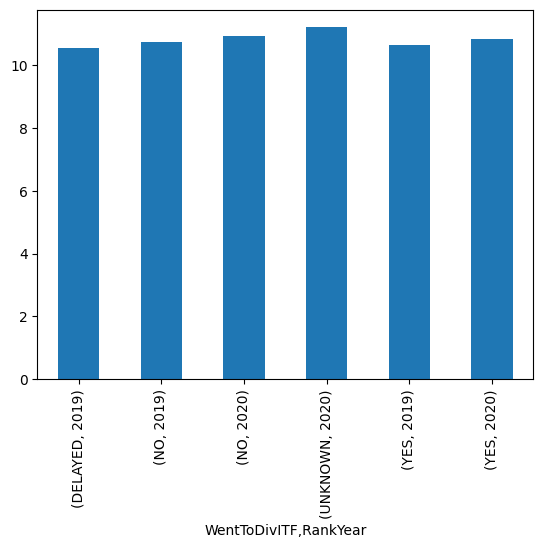

In [539]:
df_athletes_best_100.groupby(["WentToDivITF", "RankYear"])["100 Meters"].mean().plot(kind = "bar")

array([[<Axes: title={'center': '(DELAYED, 2019)'}>,
        <Axes: title={'center': '(NO, 2019)'}>],
       [<Axes: title={'center': '(NO, 2020)'}>,
        <Axes: title={'center': '(UNKNOWN, 2020)'}>],
       [<Axes: title={'center': '(YES, 2019)'}>,
        <Axes: title={'center': '(YES, 2020)'}>]], dtype=object)

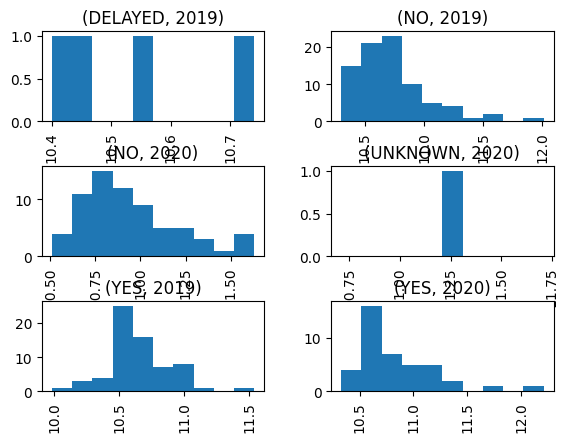

In [540]:
df_athletes_best_100.hist("100 Meters", by=["WentToDivITF", "RankYear"])

### look at 200 meter times

In [541]:
df_athletes_best_200 = df_athletes_best_times[df_athletes_best_times["200 Meters"].notna()]
df_athletes_best_200["200 Meters"] = df_athletes_best_200["200 Meters"].astype(float)
df_athletes_best_200["200 Meters"].mean()

21.587864406779662

In [542]:
df_athletes_best_200.groupby(["WentToDivITF", "RankYear"])["200 Meters"].mean()

WentToDivITF  RankYear
DELAYED       2019        21.020000
NO            2019        21.419556
              2020        21.952532
UNKNOWN       2020        22.290000
YES           2019        21.260286
              2020        21.816000
Name: 200 Meters, dtype: float64

array([[<Axes: title={'center': '(DELAYED, 2019)'}>,
        <Axes: title={'center': '(NO, 2019)'}>],
       [<Axes: title={'center': '(NO, 2020)'}>,
        <Axes: title={'center': '(UNKNOWN, 2020)'}>],
       [<Axes: title={'center': '(YES, 2019)'}>,
        <Axes: title={'center': '(YES, 2020)'}>]], dtype=object)

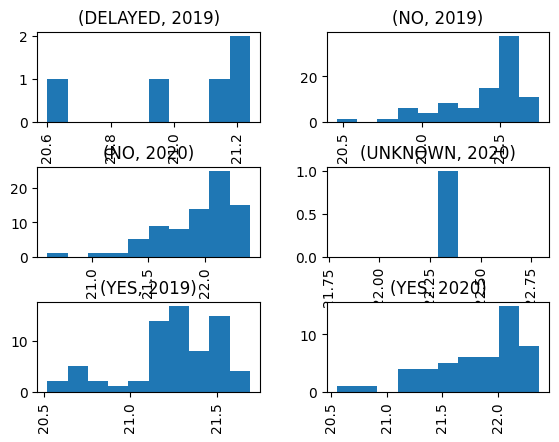

In [543]:
df_athletes_best_200.hist("200 Meters", by=["WentToDivITF", "RankYear"])

#### get the mean 200 meters score for 2019, 2020

In [544]:
df_athletes_best_200[df_athletes_best_200["RankYear"] == 2019].sort_values("200 Meters").head(50)["200 Meters"].mean()

21.0006

In [545]:
df_athletes_best_200[df_athletes_best_200["RankYear"] == 2020].sort_values("200 Meters").head(50)["200 Meters"].mean()

21.5182

### look at 400 meters

In [546]:
df_athletes_best_400 = df_athletes_best_times[df_athletes_best_times["400 Meters"].notna()]
df_athletes_best_400["400 Meters"] = df_athletes_best_400["400 Meters"].astype(float)
df_athletes_best_400["400 Meters"].mean()

<ipython-input-546-40094ba020a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_400["400 Meters"] = df_athletes_best_400["400 Meters"].astype(float)


50.79652849740933

In [547]:
df_athletes_best_400.groupby(["WentToDivITF", "RankYear"])["400 Meters"].mean()

WentToDivITF  RankYear
DELAYED       2019        50.975000
NO            2019        50.706038
              2020        52.063333
YES           2019        49.254815
              2020        51.529677
Name: 400 Meters, dtype: float64

array([[<Axes: title={'center': '(DELAYED, 2019)'}>,
        <Axes: title={'center': '(NO, 2019)'}>],
       [<Axes: title={'center': '(NO, 2020)'}>,
        <Axes: title={'center': '(YES, 2019)'}>],
       [<Axes: title={'center': '(YES, 2020)'}>, <Axes: >]], dtype=object)

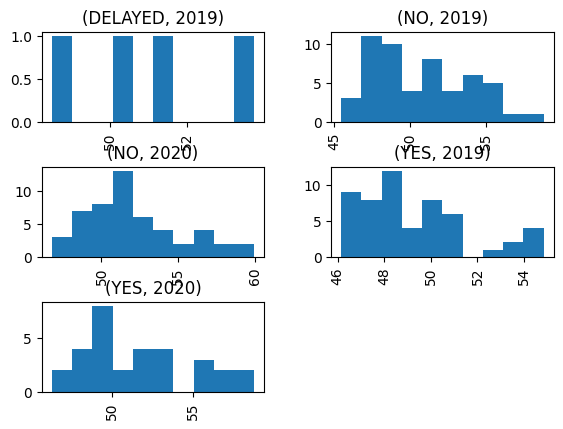

In [548]:
df_athletes_best_400.hist("400 Meters", by=["WentToDivITF", "RankYear"])

# build a model to predict DIVI based on times

In [549]:
# prompt: set the value of WentToDIVITFSimple equal to yes if WentToDIVITF is equal to YES

df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip() == "YES"
df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITFSimple"].astype(int)

<ipython-input-549-0058e6bff3ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITF"].str.upper().str.strip() == "YES"
<ipython-input-549-0058e6bff3ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_best_times["WentToDivITFSimple"] = df_athletes_best_times["WentToDivITFSimple"].astype(int)


In [550]:
df_athletes_best_times

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
0,NaN,NaN,12,Luc Andrada,https://www.athletic.net/athlete/10020150/trac...,2019,YES,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81,1
1,NaN,NaN,12,Jake Armstrong,https://www.athletic.net/athlete/10048935/trac...,2020,NO,https://www.athletic.net/athlete/10048935/trac...,10.83,22.18,49.87,0
2,NaN,NaN,12,Tyler Williams,https://www.athletic.net/athlete/10050856/trac...,2019,YES,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07,1
3,NaN,NaN,12,Jp Vaught,https://www.athletic.net/athlete/10122054/trac...,2019,NO,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51,0
4,NaN,18.0,12,Dylan Kautz,https://www.athletic.net/athlete/10172026/trac...,2019,YES,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
311,22.0,NaN,12,raymontre Palmer,https://www.athletic.net/athlete/9932412/track...,2019,NO,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42,0
312,NaN,NaN,12,Kenny Solomon,https://www.athletic.net/athlete/9944319/track...,2019,YES,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN,1
313,NaN,NaN,12,Bernard Bell,https://www.athletic.net/athlete/9962891/track...,2019,NO,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN,0
314,NaN,18.0,12,Alajuwan Robinson,https://www.athletic.net/athlete/9972616/track...,2019,YES,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49,1


In [551]:
# prompt: get the rows from df_athletes_best_times where RankYear is 2019

df_athletes_best_times_2019 = df_athletes_best_times[df_athletes_best_times["RankYear"] == 2019]

In [552]:
df_athletes_best_times_2019.isnull().sum()

Rank                  120
Age                    98
Grade                   0
Athlete                 0
AthleteLink             0
RankYear                0
WentToDivITF            0
AtheleteLink            0
100 Meters             13
200 Meters              0
400 Meters             54
WentToDivITFSimple      0
dtype: int64

<Axes: >

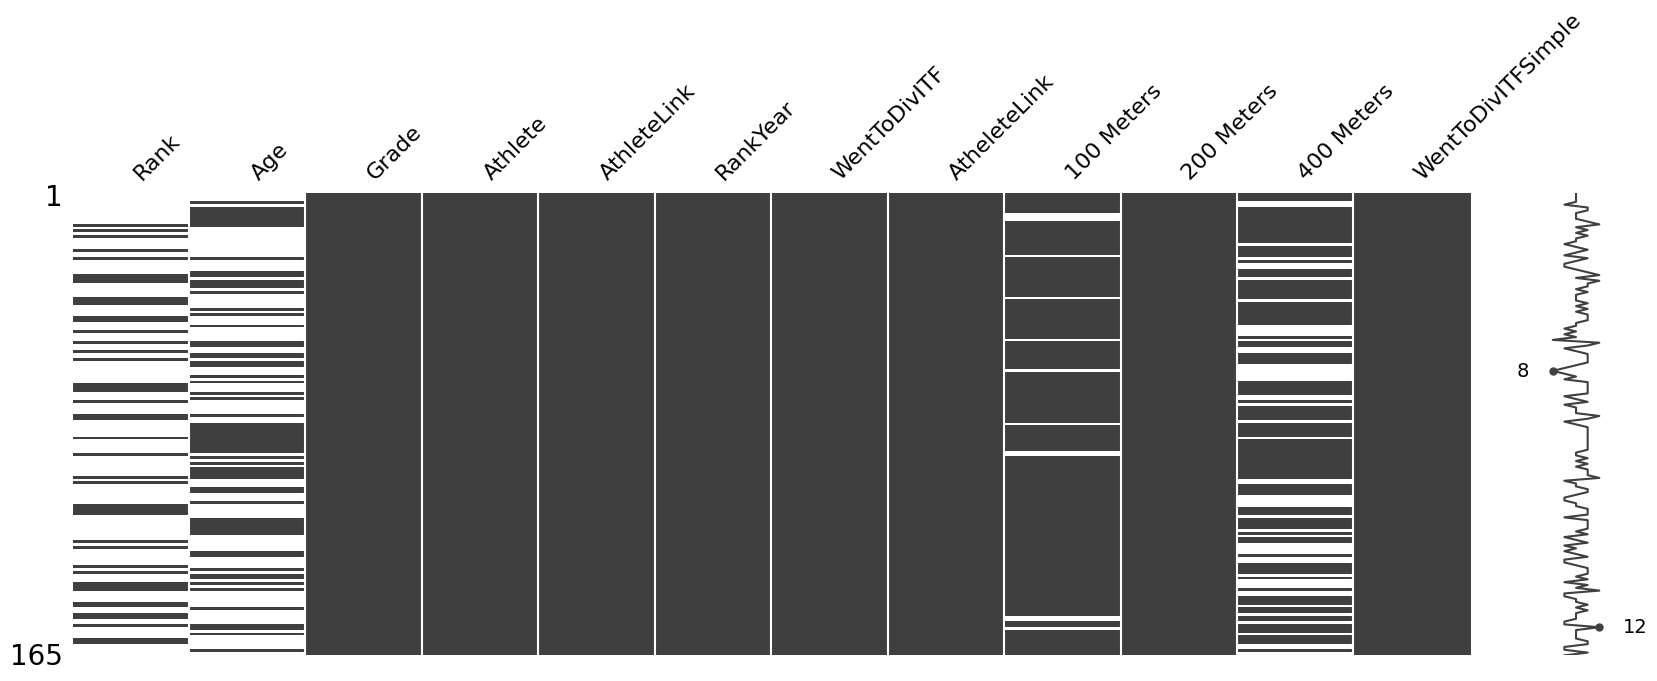

In [553]:
mno.matrix(df_athletes_best_times_2019, figsize = (20, 6))

In [554]:
df_athletes_best_times_2020 = df_athletes_best_times[df_athletes_best_times["RankYear"] == 2020]

<Axes: >

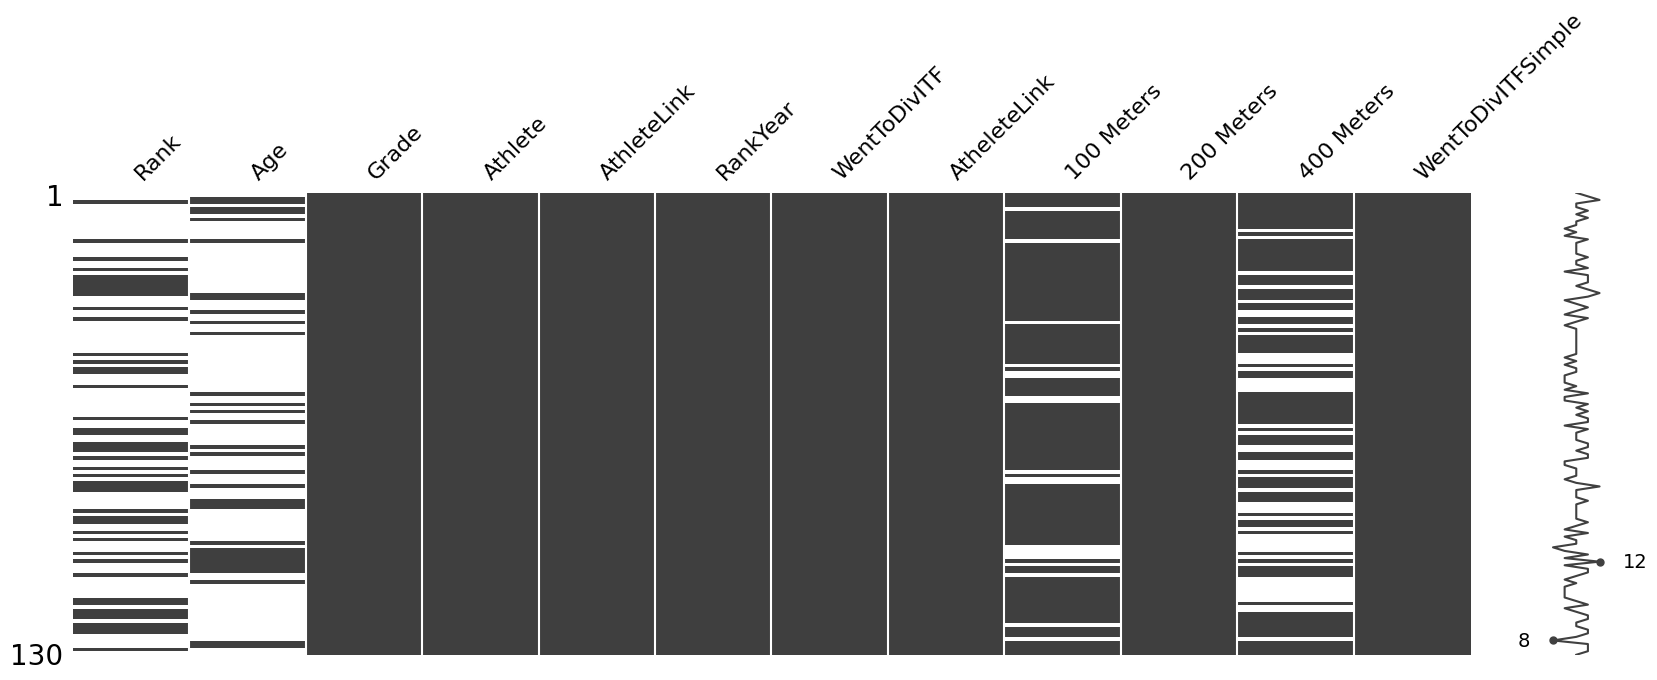

In [555]:
mno.matrix(df_athletes_best_times_2020, figsize = (20, 6))

In [556]:
df_athletes_best_times_2020.isnull().sum()

Rank                  84
Age                   97
Grade                  0
Athlete                0
AthleteLink            0
RankYear               0
WentToDivITF           0
AtheleteLink           0
100 Meters            19
200 Meters             0
400 Meters            48
WentToDivITFSimple     0
dtype: int64

In [557]:
df_athletes_best_times_2019_no_na = df_athletes_best_times_2019[df_athletes_best_times_2019["100 Meters"].notna() & df_athletes_best_times_2019["200 Meters"].notna() & df_athletes_best_times_2019["400 Meters"].notna()]

We should impute the missing values. We dont want to exclude the data we have that is missing a value and it should be reasonable to impute the times for one event based on the others

https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression



In [558]:
# missing_columns = ["100 Meters", "200 Meters", "400 Meters"]

In [559]:
X = df_athletes_best_times_2019[["100 Meters", "200 Meters", "400 Meters"]]
y = df_athletes_best_times_2019["WentToDivITFSimple"]

Plan:

1.   predict 200 from 100
2.   fill in 200
3.   predict 100 from 200
4.   fill in 100
5.   predict 400 from 20
6.   fill in 200

In [560]:
from sklearn import linear_model

def ImputeMissingScores(X):
  if (len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()]) > 0) :
    model2 = linear_model.LinearRegression()
    # fit the model to the data with no Nan
    model2.fit(X = df_athletes_best_times_2019_no_na[["100 Meters"]], y = df_athletes_best_times_2019_no_na["200 Meters"])
    # only fill in the 200 meters where the 100 meters is present. If the 100 and 200 meters are not present this would not work
    X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "Det" + "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])
    X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

  if (len(X[["100 Meters"]][X["100 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
    model1 = linear_model.LinearRegression()
    # fit the model to the data with no Nan
    model1.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["100 Meters"])
    X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
    X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]

  if (len(X[["400 Meters"]][X["400 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
    model4 = linear_model.LinearRegression()
    # fit the model to the data with no Nan
    model4.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["400 Meters"])
    X.loc[X["400 Meters"].isnull(), "Det" + "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]
    X.loc[X["400 Meters"].isnull(), "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]

  X = X[["100 Meters", "200 Meters", "400 Meters"]]

  return X

In [561]:
X = ImputeMissingScores(X)

<ipython-input-560-040f14f21f66>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-560-040f14f21f66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-560-040f14f21f66>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [562]:
X

,100 Meters,200 Meters,400 Meters
0,10.51,21.21,50.810000
2,10.88,21.41,47.070000
3,10.50,21.33,48.510000
4,10.53,21.54,10.842578
5,10.38,21.51,10.824931
...,...,...,...
311,10.39,20.91,51.420000
312,10.57,21.57,10.860225
313,10.60,21.61,10.883755
314,10.46,21.14,52.490000


In [563]:
y

0      1
2      1
3      0
4      1
5      1
      ..
311    0
312    1
313    0
314    1
315    1
Name: WentToDivITFSimple, Length: 165, dtype: int64

In [564]:
len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

0

In [565]:
# if (len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()]) > 0) :
#   model2 = linear_model.LinearRegression()
#   # fit the model to the data with no Nan
#   model2.fit(X = df_athletes_best_times_2019_no_na[["100 Meters"]], y = df_athletes_best_times_2019_no_na["200 Meters"])
#   # only fill in the 200 meters where the 100 meters is present. If the 100 and 200 meters are not present this would not work
#   X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "Det" + "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])
#   X.loc[X["200 Meters"].isnull() & X["100 Meters"].notnull(), "200 Meters"]  = model2.predict(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

In [566]:
# if (len(X[["100 Meters"]][X["100 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
#   model1 = linear_model.LinearRegression()
#   # fit the model to the data with no Nan
#   model1.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["100 Meters"])
#   X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
#   X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]

In [567]:
# if (len(X[["400 Meters"]][X["400 Meters"].isnull() & X["200 Meters"].notnull()]) > 0) :
#   model4 = linear_model.LinearRegression()
#   # fit the model to the data with no Nan
#   model4.fit(X = df_athletes_best_times_2019_no_na[["200 Meters"]], y = df_athletes_best_times_2019_no_na["400 Meters"])
#   X.loc[X["400 Meters"].isnull(), "Det" + "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]
#   X.loc[X["400 Meters"].isnull(), "400 Meters"] = model1.predict(X[["200 Meters"]])[X["400 Meters"].isnull()]

# EDA

In [568]:
df_athletes_best_times_2019

,Rank,Age,Grade,Athlete,AthleteLink,RankYear,WentToDivITF,AtheleteLink,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
0,NaN,NaN,12,Luc Andrada,https://www.athletic.net/athlete/10020150/trac...,2019,YES,https://www.athletic.net/athlete/10020150/trac...,10.51,21.21,50.81,1
2,NaN,NaN,12,Tyler Williams,https://www.athletic.net/athlete/10050856/trac...,2019,YES,https://www.athletic.net/athlete/10050856/trac...,10.88,21.41,47.07,1
3,NaN,NaN,12,Jp Vaught,https://www.athletic.net/athlete/10122054/trac...,2019,NO,https://www.athletic.net/athlete/10122054/trac...,10.50,21.33,48.51,0
4,NaN,18.0,12,Dylan Kautz,https://www.athletic.net/athlete/10172026/trac...,2019,YES,https://www.athletic.net/athlete/10172026/trac...,10.53,21.54,NaN,1
5,NaN,NaN,12,Deron Dudley,https://www.athletic.net/athlete/10203178/trac...,2019,YES,https://www.athletic.net/athlete/10203178/trac...,10.38,21.51,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
311,22.0,NaN,12,raymontre Palmer,https://www.athletic.net/athlete/9932412/track...,2019,NO,https://www.athletic.net/athlete/9932412/track...,10.39,20.91,51.42,0
312,NaN,NaN,12,Kenny Solomon,https://www.athletic.net/athlete/9944319/track...,2019,YES,https://www.athletic.net/athlete/9944319/track...,10.57,21.57,NaN,1
313,NaN,NaN,12,Bernard Bell,https://www.athletic.net/athlete/9962891/track...,2019,NO,https://www.athletic.net/athlete/9962891/track...,10.60,21.61,NaN,0
314,NaN,18.0,12,Alajuwan Robinson,https://www.athletic.net/athlete/9972616/track...,2019,YES,https://www.athletic.net/athlete/9972616/track...,10.46,21.14,52.49,1


In [569]:
df_athletes_best_times_2019.corr(method='pearson')

<ipython-input-569-36331cadca04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_athletes_best_times_2019.corr(method='pearson')


,Rank,Age,RankYear,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
Rank,1.000000,0.263869,NaN,0.490023,0.801670,0.352163,-0.122494
Age,0.263869,1.000000,NaN,-0.125109,-0.046264,0.002977,-0.320231
RankYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 Meters,0.490023,-0.125109,NaN,1.000000,0.408697,-0.119184,-0.146690
200 Meters,0.801670,-0.046264,NaN,0.408697,1.000000,0.131701,-0.249767
400 Meters,0.352163,0.002977,NaN,-0.119184,0.131701,1.000000,-0.258091
WentToDivITFSimple,-0.122494,-0.320231,NaN,-0.146690,-0.249767,-0.258091,1.000000


In [570]:
df_athletes_best_times_2020.corr(method='pearson')

<ipython-input-570-6bd5b95b1791>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_athletes_best_times_2020.corr(method='pearson')


,Rank,Age,RankYear,100 Meters,200 Meters,400 Meters,WentToDivITFSimple
Rank,1.000000,-0.005912,NaN,0.252116,0.706990,0.365695,-0.480283
Age,-0.005912,1.000000,NaN,-0.031939,0.170660,0.248908,-0.220692
RankYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 Meters,0.252116,-0.031939,NaN,1.000000,0.403265,-0.138476,-0.170055
200 Meters,0.706990,0.170660,NaN,0.403265,1.000000,0.211324,-0.185240
400 Meters,0.365695,0.248908,NaN,-0.138476,0.211324,1.000000,-0.081869
WentToDivITFSimple,-0.480283,-0.220692,NaN,-0.170055,-0.185240,-0.081869,1.000000


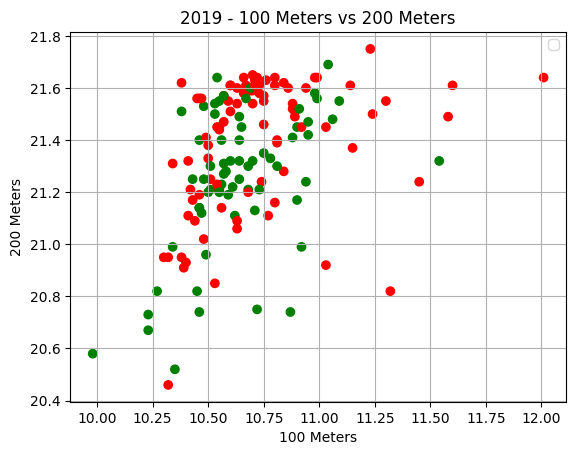

In [571]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['200 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2019 - 100 Meters vs 200 Meters")

plt.xlabel("100 Meters")
plt.ylabel("200 Meters")

plt.show()




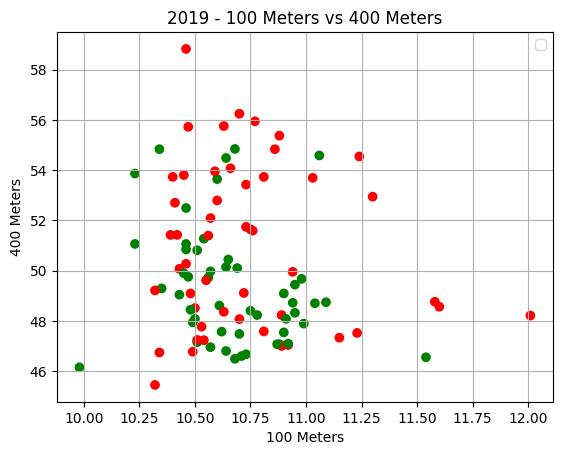

In [572]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['400 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2019 - 100 Meters vs 400 Meters")

plt.xlabel("100 Meters")
plt.ylabel("400 Meters")

plt.show()

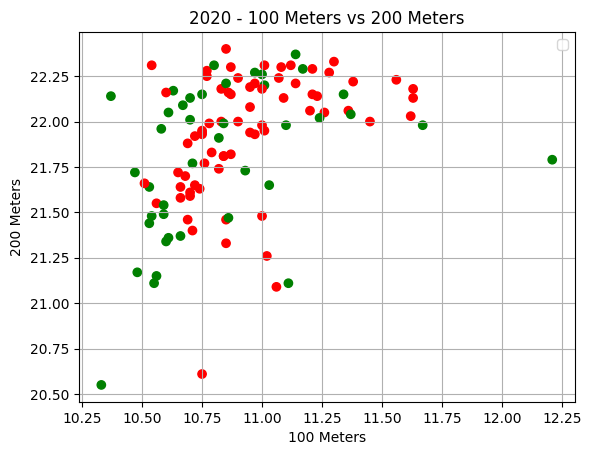

In [573]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['200 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2020 - 100 Meters vs 200 Meters")

plt.xlabel("100 Meters")
plt.ylabel("200 Meters")

plt.show()

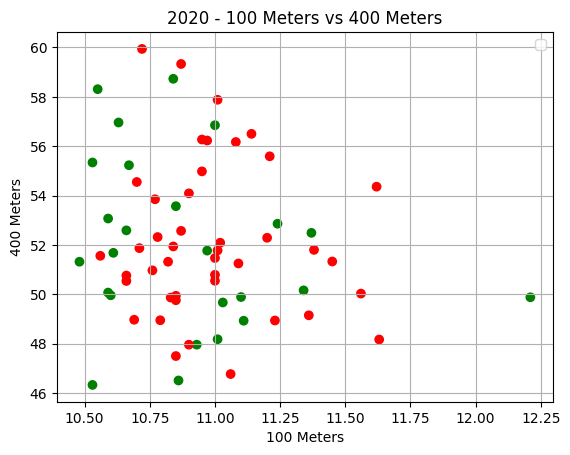

In [574]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['400 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))

ax.legend()
ax.grid(True)

plt.title("2020 - 100 Meters vs 400 Meters")

plt.xlabel("100 Meters")
plt.ylabel("400 Meters")

plt.show()

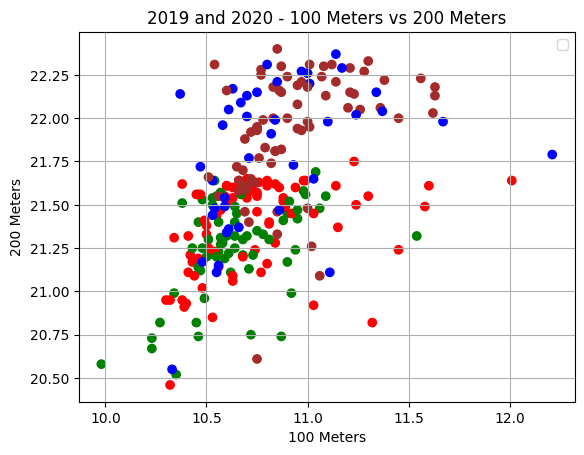

In [575]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['200 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

colors = {0:'brown', 1:'blue'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['200 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))


ax.legend()
ax.grid(True)

plt.title("2019 and 2020 - 100 Meters vs 200 Meters")

plt.xlabel("100 Meters")
plt.ylabel("200 Meters")

plt.show()

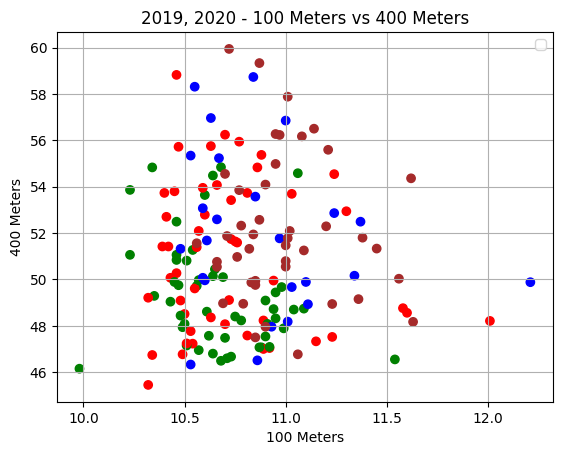

In [576]:
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}


scatter = ax.scatter(df_athletes_best_times_2019['100 Meters'], df_athletes_best_times_2019['400 Meters'], c=df_athletes_best_times_2019['WentToDivITFSimple'].map(colors))

colors = {0:'brown', 1:'blue'}


scatter = ax.scatter(df_athletes_best_times_2020['100 Meters'], df_athletes_best_times_2020['400 Meters'], c=df_athletes_best_times_2020['WentToDivITFSimple'].map(colors))


ax.legend()
ax.grid(True)

plt.title("2019, 2020 - 100 Meters vs 400 Meters")

plt.xlabel("100 Meters")
plt.ylabel("400 Meters")

plt.show()

### get the percentage of students who went to DI track and field by year

In [577]:
len(df_athletes_best_times_2019)

165

In [578]:
len(df_athletes_best_times_2019[df_athletes_best_times_2019["WentToDivITFSimple"] == 1])/len(df_athletes_best_times_2019)

0.42424242424242425

In [579]:
len(df_athletes_best_times_2020)

130

In [580]:
len(df_athletes_best_times_2020[df_athletes_best_times_2020["WentToDivITFSimple"] == 1])/len(df_athletes_best_times_2020)

0.38461538461538464

### only the top 100 - get the percentage recruited

In [581]:
df_athletes_best_times_2019_top_100 = df_athletes_best_times_2019.sort_values("200 Meters").head(100)
df_athletes_best_times_2020_top_100 = df_athletes_best_times_2020.sort_values("200 Meters").head(100)

In [582]:
len(df_athletes_best_times_2019_top_100)

100

In [583]:
len(df_athletes_best_times_2019_top_100[df_athletes_best_times_2019_top_100["WentToDivITFSimple"] == 1])/len(df_athletes_best_times_2019_top_100)

0.54

In [584]:
len(df_athletes_best_times_2020_top_100)

100

In [585]:
len(df_athletes_best_times_2020_top_100[df_athletes_best_times_2020_top_100["WentToDivITFSimple"] == 1])/len(df_athletes_best_times_2020_top_100)

0.42

# now logistic regression

In [586]:
# prompt: create a logistical regression model to predict WentToDivITFSimple based on "100 Meters", "200 Meters" and "400 meters"

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [587]:
import statsmodels.formula.api as smf

In [588]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [589]:
def print_scores(y, y_pred):

  print('Accuracy: %.3f' % accuracy_score(y, y_pred))
  print('F1: %.3f' % f1_score(y, y_pred))
  print('Precision: %.3f' % precision_score(y, y_pred))
  print('Recall: %.3f' % recall_score(y, y_pred))




## with 2019

In [590]:
X = df_athletes_best_times_2019[["100 Meters", "200 Meters", "400 Meters"]]
y = df_athletes_best_times_2019["WentToDivITFSimple"]
X = ImputeMissingScores(X)


<ipython-input-560-040f14f21f66>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-560-040f14f21f66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-560-040f14f21f66>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [591]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [592]:
clf.coef_

array([[-0.51395106, -1.15951541,  0.01567552]])

In [593]:
scores = cross_val_score(clf, X, y, cv=3)

In [594]:
scores

array([0.58181818, 0.61818182, 0.50909091])

In [595]:
np.mean(scores)

0.5696969696969697

In [596]:

y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[78, 17],
       [54, 16]])

In [597]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

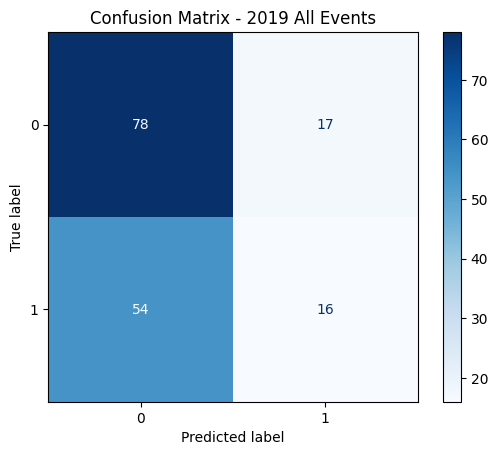

In [598]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 All Events")
plt.show()

In [599]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.82      0.69        95
           1       0.48      0.23      0.31        70

    accuracy                           0.57       165
   macro avg       0.54      0.52      0.50       165
weighted avg       0.55      0.57      0.53       165



In [600]:
print_scores(y, y_pred)

Accuracy: 0.570
F1: 0.311
Precision: 0.485
Recall: 0.229


##### using stats in order to get p values

In [601]:
data_2019_for_stats =  pd.concat([X, y], axis=1)
data_2019_for_stats.rename(columns={'100 Meters':'M100', '200 Meters':'M200', '400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100+M200+M400'
model = smf.glm(formula = formula, data=data_2019_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  165
Model:                            GLM   Df Residuals:                      161
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.62
Date:                Sat, 11 Nov 2023   Deviance:                       211.24
Time:                        19:38:08   Pearson chi2:                     164.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07968
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.7937     13.457      2.883      0.0



## with 2020

In [602]:
X = df_athletes_best_times_2020[["100 Meters", "200 Meters", "400 Meters"]]
y = df_athletes_best_times_2020["WentToDivITFSimple"]
X = ImputeMissingScores(X)


<ipython-input-560-040f14f21f66>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "Det" + "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-560-040f14f21f66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X["100 Meters"].isnull(), "100 Meters"] = model1.predict(X[["200 Meters"]])[X["100 Meters"].isnull()]
<ipython-input-560-040f14f21f66>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [603]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [604]:
clf.coef_

array([[-0.49366179, -0.67837256, -0.00200052]])

In [605]:
len(X[["100 Meters"]][X["200 Meters"].isnull() & X["100 Meters"].notnull()])

0

In [606]:
scores = cross_val_score(clf, X, y, cv=3)

In [607]:
scores

array([0.59090909, 0.6744186 , 0.60465116])

In [608]:
np.mean(scores)

0.6233262861169838

In [609]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[76,  4],
       [45,  5]])

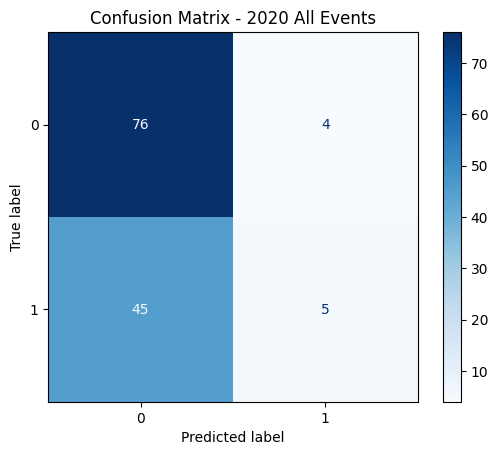

In [610]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2020 All Events")
plt.show()

In [611]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76        80
           1       0.56      0.10      0.17        50

    accuracy                           0.62       130
   macro avg       0.59      0.53      0.46       130
weighted avg       0.60      0.62      0.53       130



In [612]:
print_scores(y, y_pred)

Accuracy: 0.623
F1: 0.169
Precision: 0.556
Recall: 0.100


#### using stats in order to get p values

In [613]:
data_2020_for_stats =  pd.concat([X, y], axis=1)
data_2020_for_stats.rename(columns={'100 Meters':'M100', '200 Meters':'M200', '400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100+M200+M400'
model = smf.glm(formula = formula, data=data_2020_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  130
Model:                            GLM   Df Residuals:                      126
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83.958
Date:                Sat, 11 Nov 2023   Deviance:                       167.92
Time:                        19:38:09   Pearson chi2:                     130.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04006
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.8095     11.103      2.144      0.0

## Logistic regression using only one variable (event) at a time with no imputed values

https://medium.com/@prustaniket/p-value-for-linear-and-logistic-regression-in-stats-model-api-332fda81a39f

### 2019

#### 100 meters

In [614]:
X= df_athletes_best_times_2019[["100 Meters"]][ df_athletes_best_times_2019["100 Meters"].notnull()]
y = df_athletes_best_times_2019["WentToDivITFSimple"][ df_athletes_best_times_2019["100 Meters"].notnull()]


In [615]:
scores = cross_val_score(clf, X, y, cv=3)
scores

array([0.54901961, 0.56862745, 0.54      ])

In [616]:
np.mean(scores)

0.5525490196078432

In [617]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[82,  4],
       [64,  2]])

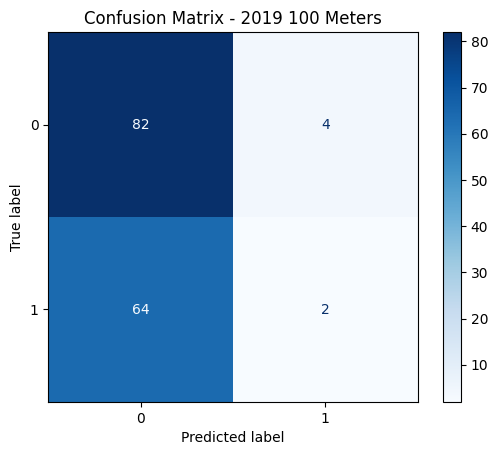

In [618]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 100 Meters")
plt.show()

In [619]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.95      0.71        86
           1       0.33      0.03      0.06        66

    accuracy                           0.55       152
   macro avg       0.45      0.49      0.38       152
weighted avg       0.46      0.55      0.42       152



In [620]:
print_scores(y, y_pred)

Accuracy: 0.553
F1: 0.056
Precision: 0.333
Recall: 0.030


#### use stats for p values

In [621]:
data_2019_100_for_stats =  pd.concat([X, y], axis=1)
data_2019_100_for_stats.rename(columns={'100 Meters':'M100'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100'
model = smf.glm(formula = formula, data=data_2019_100_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  152
Model:                            GLM   Df Residuals:                      150
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -102.34
Date:                Sat, 11 Nov 2023   Deviance:                       204.67
Time:                        19:38:10   Pearson chi2:                     152.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02215
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5469      6.656      1.735      0.0

#### 200 meters

In [622]:
X= df_athletes_best_times_2019[["200 Meters"]][ df_athletes_best_times_2019["200 Meters"].notnull()]
y = df_athletes_best_times_2019["WentToDivITFSimple"][ df_athletes_best_times_2019["200 Meters"].notnull()]


In [623]:
scores = cross_val_score(clf, X, y, cv=3)
scores

array([0.54545455, 0.67272727, 0.52727273])

In [624]:
np.mean(scores)

0.5818181818181819

In [625]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[84, 11],
       [58, 12]])

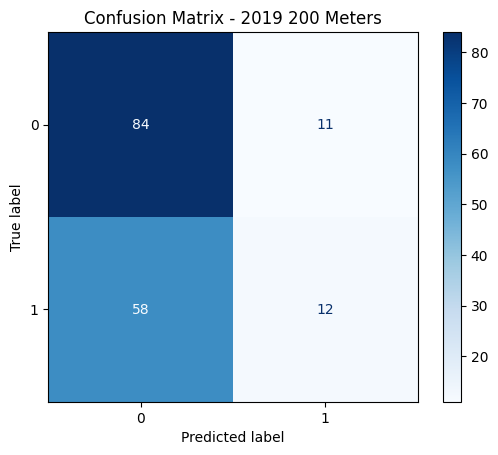

In [626]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 200 Meters")
plt.show()

In [627]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.88      0.71        95
           1       0.52      0.17      0.26        70

    accuracy                           0.58       165
   macro avg       0.56      0.53      0.48       165
weighted avg       0.56      0.58      0.52       165



In [628]:
print_scores(y, y_pred)

Accuracy: 0.582
F1: 0.258
Precision: 0.522
Recall: 0.171


#### use stats for p values

In [629]:
data_2019_200_for_stats =  pd.concat([X, y], axis=1)
data_2019_200_for_stats.rename(columns={'200 Meters':'M200'}, inplace=True)
formula = 'WentToDivITFSimple ~ M200'
model = smf.glm(formula = formula, data=data_2019_200_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  165
Model:                            GLM   Df Residuals:                      163
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -107.26
Date:                Sat, 11 Nov 2023   Deviance:                       214.52
Time:                        19:38:11   Pearson chi2:                     165.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06116
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5750     13.217      3.070      0.0

#### 400 meters

In [630]:
X= df_athletes_best_times_2019[["400 Meters"]][ df_athletes_best_times_2019["400 Meters"].notnull()]
y = df_athletes_best_times_2019["WentToDivITFSimple"][ df_athletes_best_times_2019["400 Meters"].notnull()]

In [631]:
scores = cross_val_score(clf, X, y, cv=3)
scores

array([0.51351351, 0.64864865, 0.56756757])

In [632]:
np.mean(scores)

0.5765765765765766

In [633]:
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[31, 26],
       [21, 33]])

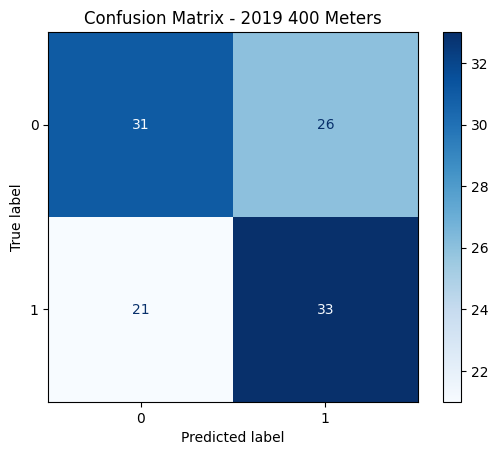

In [634]:
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 400 Meters")
plt.show()

In [635]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        57
           1       0.56      0.61      0.58        54

    accuracy                           0.58       111
   macro avg       0.58      0.58      0.58       111
weighted avg       0.58      0.58      0.58       111



In [636]:
print_scores(y, y_pred)

Accuracy: 0.577
F1: 0.584
Precision: 0.559
Recall: 0.611


#### use stats for p values

In [637]:
data_2019_400_for_stats =  pd.concat([X, y], axis=1)
data_2019_400_for_stats.rename(columns={'400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M400'
model = smf.glm(formula = formula, data=data_2019_400_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  111
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73.072
Date:                Sat, 11 Nov 2023   Deviance:                       146.14
Time:                        19:38:11   Pearson chi2:                     111.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06663
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6419      3.672      2.626      0.0

### 2020

#### 100 meters

0.6396396396396397


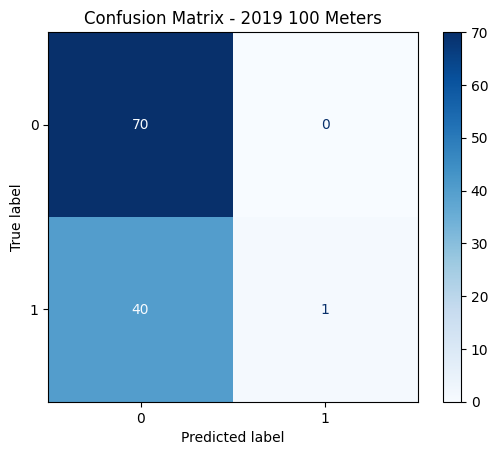

In [638]:
X= df_athletes_best_times_2020[["100 Meters"]][ df_athletes_best_times_2020["100 Meters"].notnull()]
y = df_athletes_best_times_2020["WentToDivITFSimple"][ df_athletes_best_times_2020["100 Meters"].notnull()]
scores = cross_val_score(clf, X, y, cv=3)
scores
print(np.mean(scores))
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2019 100 Meters")
plt.show()


In [639]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        70
           1       1.00      0.02      0.05        41

    accuracy                           0.64       111
   macro avg       0.82      0.51      0.41       111
weighted avg       0.77      0.64      0.51       111



In [640]:
print_scores(y, y_pred)

Accuracy: 0.640
F1: 0.048
Precision: 1.000
Recall: 0.024


#### use stats for p values

In [641]:
data_2020_100_for_stats =  pd.concat([X, y], axis=1)
data_2020_100_for_stats.rename(columns={'100 Meters':'M100'}, inplace=True)
formula = 'WentToDivITFSimple ~ M100'
model = smf.glm(formula = formula, data=data_2020_100_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  111
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71.404
Date:                Sat, 11 Nov 2023   Deviance:                       142.81
Time:                        19:38:12   Pearson chi2:                     115.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03022
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1102      7.751      1.691      0.0

#### 200 meters

0.6079985905567301


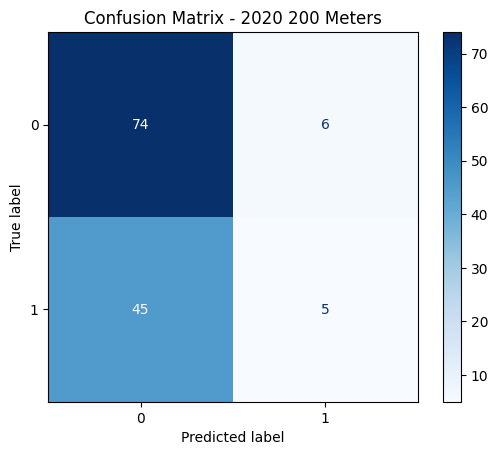

In [642]:
X= df_athletes_best_times_2020[["200 Meters"]][ df_athletes_best_times_2020["200 Meters"].notnull()]
y = df_athletes_best_times_2020["WentToDivITFSimple"][ df_athletes_best_times_2020["200 Meters"].notnull()]
scores = cross_val_score(clf, X, y, cv=3)
scores
print(np.mean(scores))
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2020 200 Meters")
plt.show()


In [643]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.93      0.74        80
           1       0.45      0.10      0.16        50

    accuracy                           0.61       130
   macro avg       0.54      0.51      0.45       130
weighted avg       0.56      0.61      0.52       130



In [644]:
print_scores(y, y_pred)

Accuracy: 0.608
F1: 0.164
Precision: 0.455
Recall: 0.100


####use stats for p values

In [645]:
data_2020_200_for_stats =  pd.concat([X, y], axis=1)
data_2020_200_for_stats.rename(columns={'200 Meters':'M200'}, inplace=True)
formula = 'WentToDivITFSimple ~ M200'
model = smf.glm(formula = formula, data=data_2020_200_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                  130
Model:                            GLM   Df Residuals:                      128
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.408
Date:                Sat, 11 Nov 2023   Deviance:                       168.82
Time:                        19:38:13   Pearson chi2:                     130.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03340
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0220     10.915      2.018      0.0

#### 400 meters

0.6097883597883599


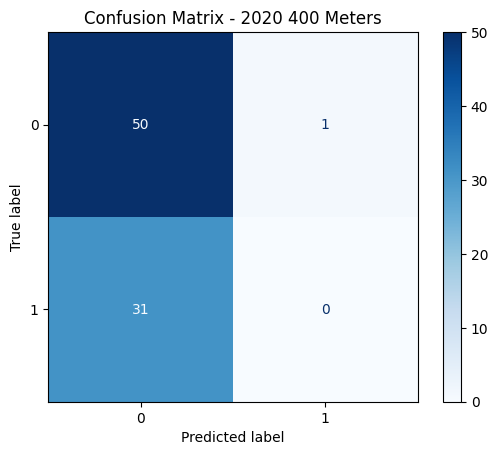

In [646]:
X= df_athletes_best_times_2020[["400 Meters"]][ df_athletes_best_times_2020["400 Meters"].notnull()]
y = df_athletes_best_times_2020["WentToDivITFSimple"][ df_athletes_best_times_2020["400 Meters"].notnull()]
scores = cross_val_score(clf, X, y, cv=3)
scores
print(np.mean(scores))
y_pred = cross_val_predict(clf, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
conf_mat
disp = ConfusionMatrixDisplay.from_predictions(
    y, y_pred,
    cmap='Blues')
disp.ax_.set_title(
    "Confusion Matrix - 2020 400 Meters")
plt.show()

In [647]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76        51
           1       0.00      0.00      0.00        31

    accuracy                           0.61        82
   macro avg       0.31      0.49      0.38        82
weighted avg       0.38      0.61      0.47        82



In [648]:
print_scores(y, y_pred)

Accuracy: 0.610
F1: 0.000
Precision: 0.000
Recall: 0.000


#### use stats for p values

In [649]:
data_2020_400_for_stats =  pd.concat([X, y], axis=1)
data_2020_400_for_stats.rename(columns={'400 Meters':'M400'}, inplace=True)
formula = 'WentToDivITFSimple ~ M400'
model = smf.glm(formula = formula, data=data_2020_400_for_stats, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     WentToDivITFSimple   No. Observations:                   82
Model:                            GLM   Df Residuals:                       80
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.096
Date:                Sat, 11 Nov 2023   Deviance:                       108.19
Time:                        19:38:14   Pearson chi2:                     82.1
No. Iterations:                     4   Pseudo R-squ. (CS):           0.006760
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3230      3.819      0.608      0.5

https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/

https://www.youtube.com/watch?v=zGdQ8fbl6j4